# Amazon Product Recommendation System —Industry Case Study

##### Build and evaluate a hybrid recommendation engine (content-based+ collaborative filtering) for an e-commerce platform using product metadata and user behavior data.

## Data Understanding and Pre-Processing

In [55]:
# ! pip install pandas numpy matplotlib seaborn scikit-learn scipy
# ! pip install scikit-surprise

# ! python --version


In [56]:
# importing necessary libraries

# Data Handling
import pandas as pd
import numpy as np
import os

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error

# For recommendation models
from sklearn.neighbors import NearestNeighbors

# To suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

sns.set(style='whitegrid', palette='muted')
plt.rcParams['figure.figsize'] = (12, 6)

# pip install scikit-surprise
# from surprise import Dataset, Reader, SVD
# from surprise.model_selection import cross_validate



In [57]:
# os.getcwd()

code_path = 'c:\\Rakshith\\Salar_AI_ML_DataScience\\Product_Recommendation_System\\Code'
data_path = 'c:\\Rakshith\\Salar_AI_ML_DataScience\\Product_Recommendation_System\\Data'

In [58]:
# Load the dataset  
df_original = pd.read_csv(os.path.join(data_path, 'amazon.csv'))

# Display the first few rows of the dataset
df_original.head(3)

# Make a copy of the original DataFrame to work with
df = df_original.copy()


### Pre-Processing

In [59]:
df.head(3)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...


In [60]:
# pre-processing the data

# Remove '₹' and commas, then convert to float
df['actual_price'] = df['actual_price'].replace('[₹,]', '', regex=True).astype(float)
df['discounted_price'] = df['discounted_price'].replace('[₹,]', '', regex=True).astype(float)
df['discount_percentage'] = df['discount_percentage'].replace('%', '', regex=True).astype(float)

df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53.0,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.0,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


### Dataset analysis (basic)

In [61]:
# Display shape and first few rows
print(f"Dataset Shape: {df.shape}")
print('------------------------------------------------------------')

# General info
df.info()
print('------------------------------------------------------------')

# Descriptive stats for numerical columns
df.describe()
print('------------------------------------------------------------')




Dataset Shape: (1465, 16)
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   object 
 7   rating_count         1463 non-null   object 
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  i

In [62]:
# Check for missing values
print("Checking for Missing Values:")
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])


Checking for Missing Values:
Missing Values:
 rating_count    2
dtype: int64


In [63]:
# See unique counts
print("\nUnique Counts for Each Column:")
print(df.nunique())



Unique Counts for Each Column:
product_id             1351
product_name           1337
category                211
discounted_price        550
actual_price            449
discount_percentage      92
rating                   28
rating_count           1143
about_product          1293
user_id                1194
user_name              1194
review_id              1194
review_title           1194
review_content         1212
img_link               1412
product_link           1465
dtype: int64


## Section A: Data Understanding & Cleaning:

### Summarize the dataset:

#### 1. Number of Unique Users, Products, and Reviews

- **Number of unique users:** 1,194  
- **Number of unique products:** 1,351  
- **Number of unique reviews:** 1,194


In [64]:
# Replace with your actual column names if different
num_users = df['user_id'].nunique()
num_products = df['product_id'].nunique()
num_reviews = df['review_id'].nunique()

print(f"Number of unique users: {num_users}")
print(f"Number of unique products: {num_products}")
print(f"Total number of reviews: {num_reviews}")



Number of unique users: 1194
Number of unique products: 1351
Total number of reviews: 1194


#### 2. Top 5 Categories by Number of Products

| Rank | Category                                                                                          | Number of Products |
|------|---------------------------------------------------------------------------------------------------|--------------------|
| 1    | Computers & Accessories → Accessories & Peripherals → Cables & Accessories → Cables → USB Cables | 233                |
| 2    | Electronics → Wearable Technology → Smart Watches                                                 | 76                 |
| 3    | Electronics → Mobiles & Accessories → Smartphones & Basic Mobiles → Smartphones                  | 68                 |
| 4    | Electronics → Home Theater, TV & Video → Televisions → Smart Televisions                          | 63                 |
| 5    | Electronics → Headphones, Earbuds & Accessories → Headphones → In-Ear                             | 52                 |


In [65]:
# Get top 5 categories
top_categories = df['category'].value_counts().head(5)
print(top_categories)


category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables    233
Electronics|WearableTechnology|SmartWatches                                           76
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones                  68
Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions                         63
Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear                          52
Name: count, dtype: int64


#### 3. Price Range and Discount Insights

- **Actual Price**
  - Minimum: ₹39.00  
  - Maximum: ₹139,900.00  
  - Median: ₹1,650.00

- **Discounted Price**
  - Minimum: ₹39.00  
  - Maximum: ₹77,990.00  
  - Median: ₹799.00

- **Discount Percentage**
  - Minimum: 0.00%  
  - Maximum: 94.00%  
  - Mean: 47.69%  
  - Median: 50.00%

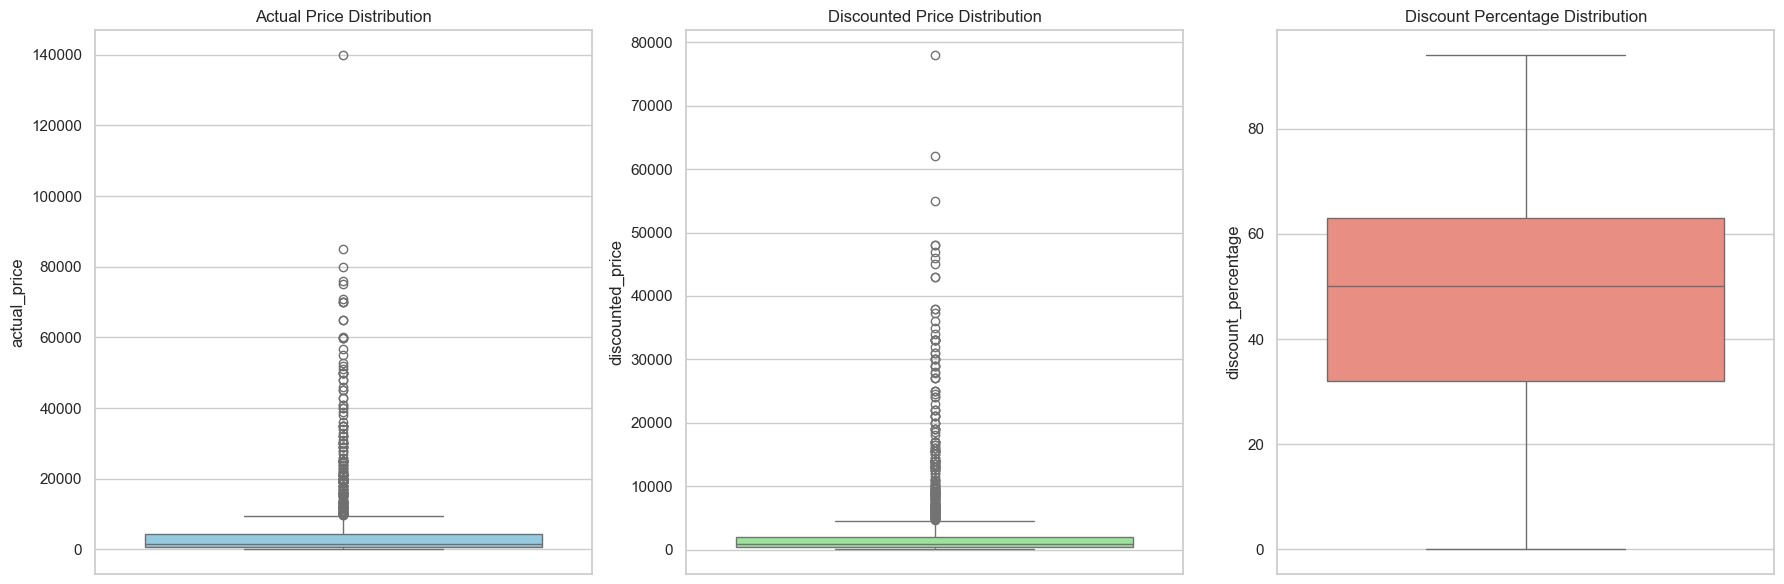

--- 

**Key Insights**:
- The actual and discounted price distributions show the presence of **high-value outliers**, as seen in the boxplots.
- The **median discounted price (₹799.00)** is **lower than the median actual price (₹1,650.00)**, reflecting a general trend of discounting.
- The discount percentage distribution has a **median of 50%** and a **mean of 47.69%**, suggesting that **half of the products are offered at a discount of 50% or less**.
- **Minimum discount is 0%**, indicating that **some products are sold at full price**.




In [66]:
# Summary statistics for actual price
actual_price_min = df['actual_price'].min()
actual_price_max = df['actual_price'].max()
actual_price_median = df['actual_price'].median()

# Summary statistics for discounted price
discounted_price_min = df['discounted_price'].min()
discounted_price_max = df['discounted_price'].max()
discounted_price_median = df['discounted_price'].median()

# Summary statistics for discount percentage
discount_pct_min = df['discount_percentage'].min()
discount_pct_max = df['discount_percentage'].max()
discount_pct_mean = df['discount_percentage'].mean()
discount_pct_median = df['discount_percentage'].median()

# Display results
print("Price and Discount Insights")
print(f"Actual Price: Min ₹{actual_price_min:.2f}, Max ₹{actual_price_max:.2f}, Median ₹{actual_price_median:.2f}")
print(f"Discounted Price: Min ₹{discounted_price_min:.2f}, Max ₹{discounted_price_max:.2f}, Median ₹{discounted_price_median:.2f}")
print(f"Discount Percentage: Min {discount_pct_min:.2f}%, Max {discount_pct_max:.2f}%, Mean {discount_pct_mean:.2f}%, Median {discount_pct_median:.2f}%")


Price and Discount Insights
Actual Price: Min ₹39.00, Max ₹139900.00, Median ₹1650.00
Discounted Price: Min ₹39.00, Max ₹77990.00, Median ₹799.00
Discount Percentage: Min 0.00%, Max 94.00%, Mean 47.69%, Median 50.00%


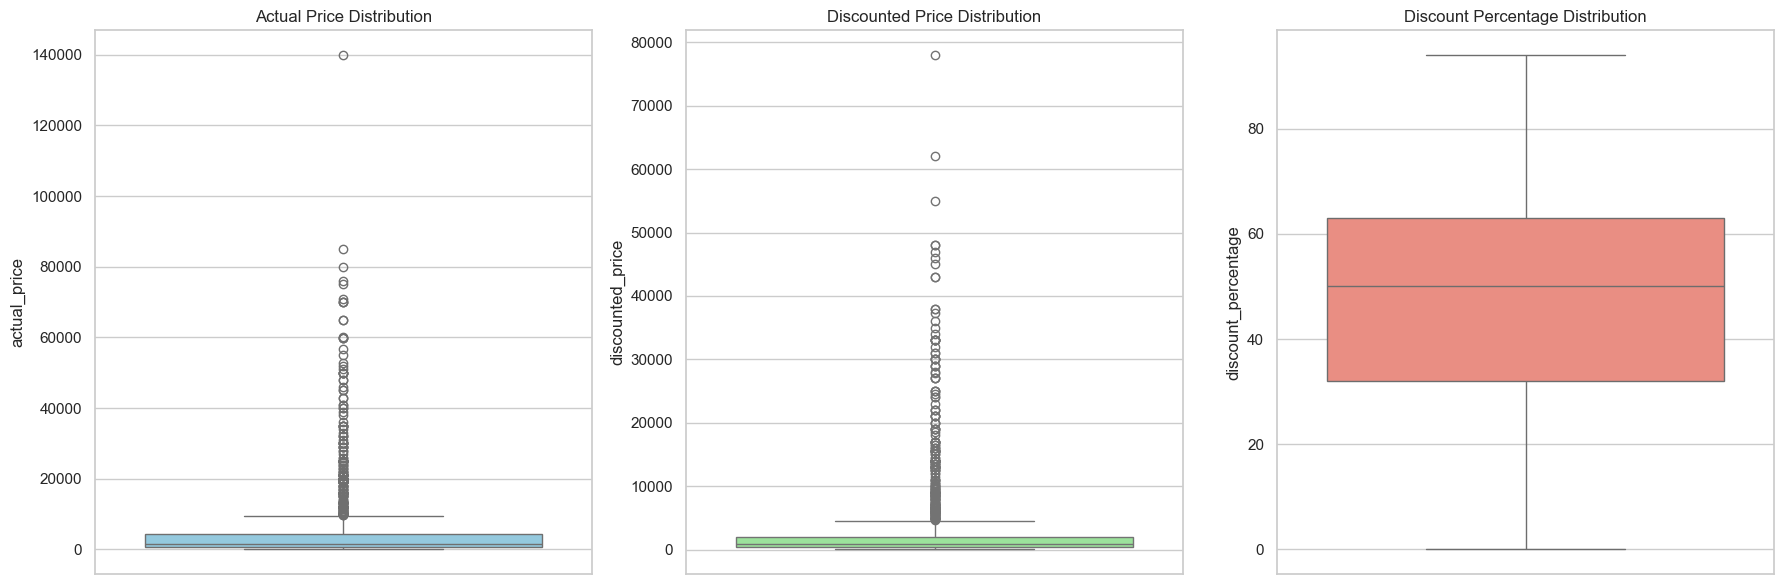

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(y=df['actual_price'], ax=axes[0], color='skyblue')
axes[0].set_title("Actual Price Distribution")

sns.boxplot(y=df['discounted_price'], ax=axes[1], color='lightgreen')
axes[1].set_title("Discounted Price Distribution")

sns.boxplot(y=df['discount_percentage'], ax=axes[2], color='salmon')
axes[2].set_title("Discount Percentage Distribution")

plt.tight_layout()
plt.show()


### Clean and preprocess the data

In [68]:
df.head(3)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...


#### Convert prices to numeric

In [69]:
# Remove '₹' and commas, then convert to float
df['actual_price'] = df['actual_price'].replace('[₹,]', '', regex=True).astype(float)
df['discounted_price'] = df['discounted_price'].replace('[₹,]', '', regex=True).astype(float)

# Remove '%' and convert to float
df['discount_percentage'] = df['discount_percentage'].replace('%', '', regex=True).astype(float)

#### Parse categories into hierarchy levels

In [70]:
#split the category levels by '|'
category_hierarchy_df = df['category'].str.split('|', expand=True)

#Assign columns names
category_hierarchy_df.columns = [f'category_level_{i+1}' for i in category_hierarchy_df.columns]

#cancat it to the original dataframe
df = pd.concat([df, category_hierarchy_df],axis=1)

# Extract last category level after splitting by '|'
df['category_last_level'] = df['category'].astype(str).apply(lambda x: x.split('|')[-1] if '|' in x else x)

df.head(3)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,...,img_link,product_link,category_level_1,category_level_2,category_level_3,category_level_4,category_level_5,category_level_6,category_level_7,category_last_level
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None,USBCables
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None,USBCables
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None,USBCables


#### Normalize rating scores and count outliers or Create derived features like price_difference, value_for_money_score, weighted ratings.

- **dropped the rows with rating and rating_count if it is null**

- **Outliers in ratings:**

---

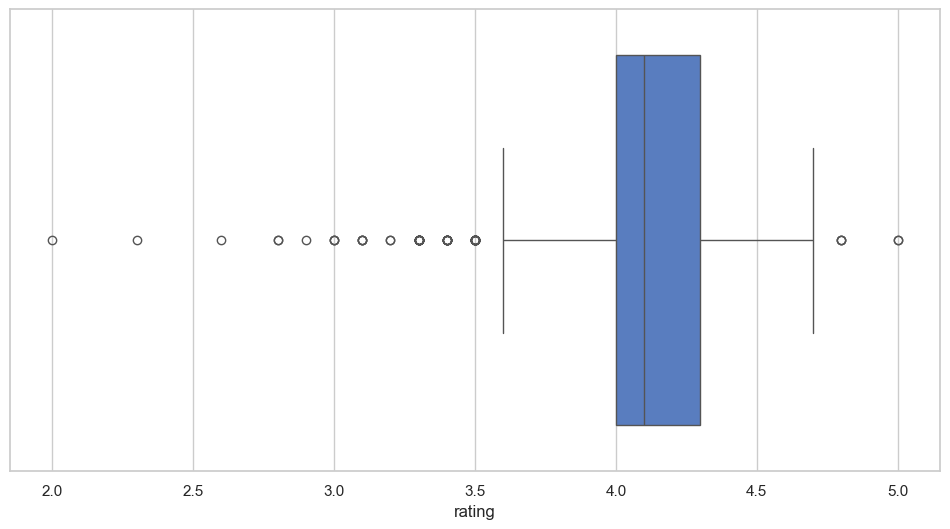

---

- Q1 (25th percentile): 4.0
- Q3 (75th percentile): 4.3
- IQR: 0.2999999999999998
- Lower Bound: 3.5500000000000003
- Upper Bound: 4.75
- Number of rating outliers: 74

Nulls count in rating column


np.int64(0)

-----------------------------------------------------------------


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,...,product_link,category_level_1,category_level_2,category_level_3,category_level_4,category_level_5,category_level_6,category_level_7,category_last_level,rating_z_score
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None,USBCables,0.354558
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None,USBCables,-0.331139
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None,USBCables,-0.673988


Box plot
-----------------------------------------------------------------


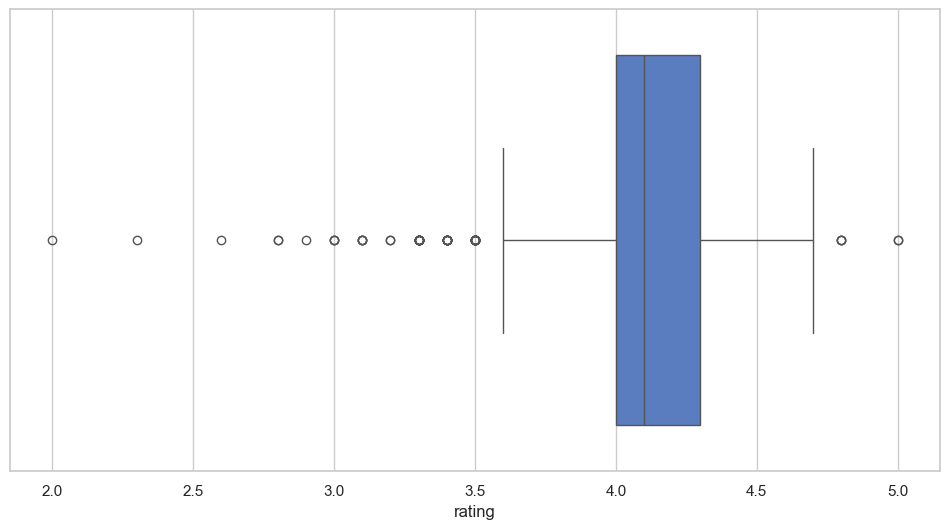

-----------------------------------------------------------------
Q1 (25th percentile): 4.0
Q3 (75th percentile): 4.3
IQR: 0.2999999999999998
Lower Bound: 3.5500000000000003
Upper Bound: 4.75
Number of rating outliers: 72
-----------------------------------------------------------------
outliers in the normalized rating
Number of outliers in rating column (|Z| > 3): 17


In [71]:
# normaling the ratings using z-score

from scipy.stats import zscore

#Check for nulls : 0
print('Nulls count in rating column')
display(df['rating'].isnull().sum())
print('-----------------------------------------------------------------')
# print(df['rating'].dtype)

#convert the | in rating to NA
df['rating'] = df['rating'].replace(['|'], pd.NA)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# convert the rating to int
df['rating'] = df['rating'].astype(float)
# print(df['rating'].dtype)

#dropping rows with Null rating
# df = df['rating'].dropna()

# Calculate mean and std on non-null values
mean_rating = df['rating'].mean()
std_rating = df['rating'].std()

# Drop rows where rating or rating_count is null
df = df[df['rating'].notna() & df['rating_count'].notna()].reset_index().drop(columns=['index'])

# Apply z-score only on valid rows
df['rating_z_score'] = (df['rating'] - mean_rating) / std_rating

display(df.head(3))


# Compute Q1 and Q3
Q1 = df['rating'].quantile(0.25)
Q3 = df['rating'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outlier_mask = (df['rating'] < lower_bound) | (df['rating'] > upper_bound)
num_outliers = outlier_mask.sum()

print('Box plot')
print('-----------------------------------------------------------------')
sns.boxplot(x=df['rating'])
plt.show()

print('-----------------------------------------------------------------')
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print(f"Number of rating outliers: {num_outliers}")

# -----
print('-----------------------------------------------------------------')
print('outliers in the normalized rating')
outlier_mask = df['rating_z_score'].abs() > 3
num_outliers = outlier_mask.sum()

print(f"Number of outliers in rating column (|Z| > 3): {num_outliers}")



#### 4. Derived Feature Definitions

Below are the derived metrics created to enhance product-level analysis and support smarter recommendation strategies.

---

**1. `price_difference`**

**Definition:**  
The difference between the original price and the discounted price.

**Formula:**  
`price_difference = actual_price - discounted_price`

**Insight:**  
This captures the absolute value of the discount offered and is useful for identifying heavily discounted items.

---

**2. `value_for_money_score`**

**Definition:**  
A proxy for how much value a product provides relative to its discounted price.

**Formula:**  
`value_for_money_score = rating / discounted_price`

**Insight:**  
Higher scores indicate products that are highly rated and affordably priced, making them strong candidates for value-focused recommendations.

---

**3. `weighted_rating`**

**Definition:**  
A Bayesian-adjusted rating that accounts for the number of ratings a product has received.

**Formula:**  
$$
\text{Weighted Rating} = \frac{v}{v + m} \cdot R + \frac{m}{v + m} \cdot C
$$

Where:
- \( R \): Product’s average rating  
- \( v \): Number of ratings for the product  
- \( m \): Minimum number of ratings required (e.g., 90th percentile)  
- \( C \): Mean rating across all products

**Insight:**  
Prevents products with very few high ratings from appearing better than those with many average ones. Promotes reliability in ranking.

---


In [72]:
df['price_difference'] = df['actual_price'] - df['discounted_price']
df['value_for_money_score'] = df['rating'] / df['discounted_price']

# Clean rating_count column if it has commas
df['rating_count'] = df['rating_count'].astype(str).str.replace(',', '')
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

# Compute constants
C = df['rating'].mean()
m = df['rating_count'].quantile(0.90)

# Apply weighted rating
def compute_weighted_rating(row, m=m, C=C):
    v = row['rating_count']
    R = row['rating']
    if pd.isna(v) or pd.isna(R):
        return None
    return (v / (v + m)) * R + (m / (v + m)) * C

df['weighted_rating'] = df.apply(compute_weighted_rating, axis=1)


In [73]:
# Filter valid rows
valid_vm_df = df[['product_name', 'value_for_money_score', 'rating', 'rating_count', 'weighted_rating','actual_price','discounted_price']].dropna()
valid_vm_df = valid_vm_df[valid_vm_df['value_for_money_score'] > 0]

# Compute Top 5 and Bottom 5
top_5_vm = valid_vm_df.sort_values(by='value_for_money_score', ascending=False).head(5)
bottom_5_vm = valid_vm_df.sort_values(by='value_for_money_score', ascending=True).head(5)

# Display
print("Top 5 Products by Value for Money:")
display(top_5_vm[['product_name', 'value_for_money_score', 'rating', 'rating_count', 'weighted_rating','actual_price','discounted_price']])

print("\nBottom 5 Products by Value for Money:")
display(bottom_5_vm[['product_name', 'value_for_money_score', 'rating', 'rating_count', 'weighted_rating','actual_price','discounted_price']])


Top 5 Products by Value for Money:


,product_name,value_for_money_score,rating,rating_count,weighted_rating,actual_price,discounted_price
973,E-COSMOS 5V 1.2W Portable Flexible USB LED Lig...,0.097436,3.8,3344,4.073633,39.0,39.00
995,Inventis 5V 1.2W Portable Flexible USB LED Lig...,0.092308,3.6,13572,3.970025,39.0,39.00
643,GIZGA essentials Universal Silicone Keyboard P...,0.089744,3.5,15233,3.931064,299.0,39.00
614,Classmate Octane Neon- Blue Gel Pens(Pack of 5...,0.086000,4.3,5792,4.122633,50.0,50.00
178,FLiX (Beetel Flow USB to Micro USB PVC Data Sy...,0.069097,4.0,9378,4.078213,199.0,57.89



Bottom 5 Products by Value for Money:


,product_name,value_for_money_score,rating,rating_count,weighted_rating,actual_price,discounted_price
249,Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...,0.000060,4.7,5935,4.175280,139900.0,77990.0
323,OnePlus 163.8 cm (65 inches) U Series 4K LED S...,0.000066,4.1,6753,4.097195,69999.0,61999.0
255,VU 164 cm (65 inches) The GloLED Series 4K Sma...,0.000078,4.3,3587,4.113586,85000.0,54990.0
282,LG 139 cm (55 inches) 4K Ultra HD Smart LED TV...,0.000090,4.3,1376,4.103537,79990.0,47990.0
192,Samsung 138 cm (55 inches) Crystal 4K Neo Seri...,0.000090,4.3,7109,4.127630,70900.0,47990.0


In [74]:
# Helper to get last category level
def get_last_category(row):
    for i in range(7, 0, -1):
        val = row.get(f'category_level_{i}')
        if pd.notnull(val):
            return val
    return None

# Filter valid rows
valid_df = df[['product_name', 'actual_price', 'discounted_price', 'rating', 'rating_count',
               'value_for_money_score', 'weighted_rating', 'category_level_1'] + 
               [f'category_level_{i}' for i in range(1, 8)]].dropna(subset=['weighted_rating'])

valid_df['category_last_level'] = valid_df.apply(get_last_category, axis=1)

# --- Insight 1: Crowd Favorites - Top 5 by Weighted Rating ---
insight_1_df = valid_df.sort_values(by='weighted_rating', ascending=False).head(5)

# --- Insight 2: Value ≠ Popularity - Top 5 by Weighted Rating but not top Value ---
# Get top by weighted, but exclude those that are also top in value
top_value = valid_df.sort_values(by='value_for_money_score', ascending=False).head(50)
insight_2_df = valid_df[~valid_df['product_name'].isin(top_value['product_name'])].sort_values(
    by='weighted_rating', ascending=False).head(5)

# --- Insight 3: Skewed Ratings Downweighted - Top by Rating but Not Weighted Rating ---
# Get products with high rating but low rating_count and low weighted_rating
high_rated = valid_df[(valid_df['rating'] >= 4.7) & (valid_df['rating_count'] < 20)]
insight_3_df = high_rated.sort_values(by='weighted_rating', ascending=False).head(5)

# Select columns to display
cols = ['product_name', 'actual_price', 'discounted_price', 'rating', 'rating_count',
        'value_for_money_score', 'weighted_rating', 'category_level_1', 'category_last_level']

# Final Display
print("Insight 1: Reliable Crowd Favorites")
display(insight_1_df[cols])

print("\nInsight 2: Perceived Quality > Price")
display(insight_2_df[cols])

print("\nInsight 3: Skewed Ratings Downweighted")
display(insight_3_df[cols])


Insight 1: Reliable Crowd Favorites


,product_name,actual_price,discounted_price,rating,rating_count,value_for_money_score,weighted_rating,category_level_1,category_level_1,category_last_level
1143,Swiffer Instant Electric Water Heater Faucet T...,1999.0,1439.0,4.8,53803,0.003336,4.501658,Home&Kitchen,Home&Kitchen,InstantWaterHeaters
862,SanDisk Extreme SD UHS I 64GB Card for 4K Vide...,1800.0,939.0,4.5,205052,0.004792,4.434669,Electronics,Electronics,MicroSD
40,AmazonBasics USB 2.0 Cable - A-Male to B-Male ...,695.0,209.0,4.5,107687,0.021531,4.391493,Computers&Accessories,Computers&Accessories,USBCables
850,AmazonBasics USB 2.0 Cable - A-Male to B-Male ...,695.0,209.0,4.5,107686,0.021531,4.391492,Computers&Accessories,Computers&Accessories,USBCables
808,Crucial BX500 240GB 3D NAND SATA 6.35 cm (2.5-...,3100.0,1815.0,4.5,92925,0.002479,4.379410,Computers&Accessories,Computers&Accessories,InternalSolidStateDrives



Insight 2: Perceived Quality > Price


,product_name,actual_price,discounted_price,rating,rating_count,value_for_money_score,weighted_rating,category_level_1,category_level_1,category_last_level
1143,Swiffer Instant Electric Water Heater Faucet T...,1999.0,1439.0,4.8,53803,0.003336,4.501658,Home&Kitchen,Home&Kitchen,InstantWaterHeaters
862,SanDisk Extreme SD UHS I 64GB Card for 4K Vide...,1800.0,939.0,4.5,205052,0.004792,4.434669,Electronics,Electronics,MicroSD
40,AmazonBasics USB 2.0 Cable - A-Male to B-Male ...,695.0,209.0,4.5,107687,0.021531,4.391493,Computers&Accessories,Computers&Accessories,USBCables
850,AmazonBasics USB 2.0 Cable - A-Male to B-Male ...,695.0,209.0,4.5,107686,0.021531,4.391492,Computers&Accessories,Computers&Accessories,USBCables
808,Crucial BX500 240GB 3D NAND SATA 6.35 cm (2.5-...,3100.0,1815.0,4.5,92925,0.002479,4.379410,Computers&Accessories,Computers&Accessories,InternalSolidStateDrives



Insight 3: Skewed Ratings Downweighted


,product_name,actual_price,discounted_price,rating,rating_count,value_for_money_score,weighted_rating,category_level_1,category_level_1,category_last_level
174,Syncwire LTG to USB Cable for Fast Charging Co...,1999.0,399.0,5.0,5,0.012531,4.096831,Computers&Accessories,Computers&Accessories,USBCables


### 📝 Insights from Value, Rating & Trust Analysis

---

#### **Insight 1: Trusted by Many Users**  
These products have high ratings and many reviews. They are consistently good and reliable choices for most buyers.

**Top 5 Products:**
- These are the best overall based on **weighted rating** (quality + trust).
- Great for default recommendations and “Top Picks” sections.

---

#### **Insight 2: Quality Beats Price**  
Some products are expensive but still highly rated by many users. People value their performance even if they cost more.

**Top 5 Products:**
- Not the cheapest, but worth the money.
- Ideal for branding, bundles, or premium positioning.

---

#### **Insight 3: Filter Out Rating Bias**  
Some products have perfect ratings but very few reviews. These get downweighted and don't rank high in overall trust.

**Top 5 Products:**
- May look good on the surface, but not reliable enough yet.
- Good candidates for more testing or promotion to collect real feedback.

---

#### **Insight 4: High Value for Money**  
These products offer great ratings at a low price — giving users the most satisfaction per rupee spent.

**Top 5 Products:**
- Strong price-to-quality ratio.
- Ideal for budget-conscious customers and "Best Value" recommendations.

---

#### **Insight 5: Low Value for Money**  
These products have poor value for the price — either overpriced or underperforming based on user ratings.

**Top 5 Products:**
- May indicate overpriced items or mismatched expectations.
- Useful for flagging products for discounting, bundling, or deeper review.


#### Handle missing values or anomalies:

- dropped the rows with null ratings (1 row) and rows with null ratings_count (2 rows) 

In [75]:
# Show missing value count per column
df.isnull().sum().sort_values(ascending=False)

category_level_7         1449
category_level_6         1378
category_level_5          943
category_level_4          165
category_level_3            8
actual_price                0
rating                      0
discount_percentage         0
product_id                  0
product_name                0
category                    0
discounted_price            0
review_id                   0
user_name                   0
user_id                     0
about_product               0
rating_count                0
product_link                0
review_title                0
review_content              0
category_level_1            0
category_level_2            0
img_link                    0
category_last_level         0
rating_z_score              0
price_difference            0
value_for_money_score       0
weighted_rating             0
dtype: int64

#### Remove duplicates, invalid records


**Invalid Records Summary with Logic**

- **null_rating**: 0  
  – Records where the rating field is missing.

- **null_rating_count**: 0  
  – Records where the rating count is missing.

- **invalid_rating_range**: 0  
  – Ratings that are outside the valid range of 0 to 5.

- **invalid_actual_price**: 0  
  – Records where the actual price is zero or negative.

- **invalid_discounted_price**: 0  
  – Records where the discounted price is zero or negative.

- **discounted_gt_actual**: 0  
  – Discounted price is greater than the actual price.

- **negative_rating_count**: 0  
  – Records where the rating count is negative.

- **duplicate_rows**: 0  
  – Entire rows that are exact duplicates.

- **duplicate_product_ids**: 114  
  – Duplicate entries found based on the same product ID.
  - Checked the number of unique customers. max nunique is 2.
  - Same products could be bought and returned. The same product could be bought by another customer

In [76]:
#check for duplicates
df.duplicated().sum()

np.int64(0)

In [77]:
invalid_counts = {}

# 1. Null ratings
invalid_counts['null_rating'] = df['rating'].isnull().sum()

# 2. Null rating_count
invalid_counts['null_rating_count'] = df['rating_count'].isnull().sum()

# 3. Rating not in 0–5 range
invalid_counts['invalid_rating_range'] = df[(df['rating'] < 0) | (df['rating'] > 5)].shape[0]

# 4. Negative or zero actual_price
invalid_counts['invalid_actual_price'] = df[df['actual_price'] <= 0].shape[0]

# 5. Negative or zero discounted_price
invalid_counts['invalid_discounted_price'] = df[df['discounted_price'] <= 0].shape[0]

# 6. Discounted price greater than actual price
invalid_counts['discounted_gt_actual'] = df[df['discounted_price'] > df['actual_price']].shape[0]

# 7. Negative rating_count
invalid_counts['negative_rating_count'] = df[df['rating_count'] < 0].shape[0]

# 8. Duplicate rows
invalid_counts['duplicate_rows'] = df.duplicated().sum()

# 9. Duplicates based on product_id (optional)
invalid_counts['duplicate_product_ids'] = df.duplicated(subset=['product_id']).sum()

# Print summary
print("Invalid Record Counts:")
for k, v in invalid_counts.items():
    print(f"{k:>30}: {v}")


Invalid Record Counts:
                   null_rating: 0
             null_rating_count: 0
          invalid_rating_range: 0
          invalid_actual_price: 0
      invalid_discounted_price: 0
          discounted_gt_actual: 0
         negative_rating_count: 0
                duplicate_rows: 0
         duplicate_product_ids: 114


In [78]:
# Group by product_id and count distinct user_id
user_counts_per_product = df.groupby('product_id')['user_id'].nunique().reset_index()

# Rename the column for clarity
user_counts_per_product.rename(columns={'user_id': 'unique_user_count'}, inplace=True)

# Optional: sort by number of users descending
user_counts_per_product.sort_values(by='unique_user_count', ascending=False, inplace=True)

# Display top results
display(user_counts_per_product.head())


,product_id,unique_user_count
261,B077Z65HSD,2
758,B08WRBG3XW,2
769,B08Y1SJVV5,2
770,B08Y1TFSP6,2
833,B097R25DP7,2


In [79]:
# Group by product_id
user_grouped = df.groupby('product_id').agg(
    unique_user_count=('user_id', 'nunique'),
    user_id_list=('user_id', lambda x: ','.join(sorted(set(x))))
).reset_index()

# Filter: Only include products with at least 2 unique users
user_grouped = user_grouped[user_grouped['unique_user_count'] >= 2]

# Display result
display(user_grouped.head())


,product_id,unique_user_count,user_id_list
261,B077Z65HSD,2,"AFA332YHUPB6I7KMME7SOFX5RKQQ,AH3LHRL5P4YAVOQQC..."
758,B08WRBG3XW,2,"AFB5KJR4Q5FICAHBOPDPUTB3O7QQ,AHW3QBHDOUMXODZ4E..."
769,B08Y1SJVV5,2,"AEQ2YMXSZWEOHK2EHTNLOS56YTZQ,AGRVINWECNY7323CW..."
770,B08Y1TFSP6,2,"AEQ2YMXSZWEOHK2EHTNLOS56YTZQ,AGRVINWECNY7323CW..."
833,B097R25DP7,2,"AHECNVXSW6REC5TOGBH6OJXIBL4A,AFWAX2O5B5I36ESHP..."


#### Handle missing ratings/reviews with appropriate strategy.

In [80]:
# Check how many are missing
missing_reviews = df['review_content'].isnull().sum()

# Also check for empty strings or whitespace-only reviews
blank_reviews = df['review_content'].astype(str).str.strip().eq('').sum()

print(f"Missing reviews (NaN): {missing_reviews}")
print(f"Blank or whitespace-only reviews: {blank_reviews}")


Missing reviews (NaN): 0
Blank or whitespace-only reviews: 0


## Section B: Exploratory Data Analysis:

#### Most reviewed products Visualize top 10 categories by number of products

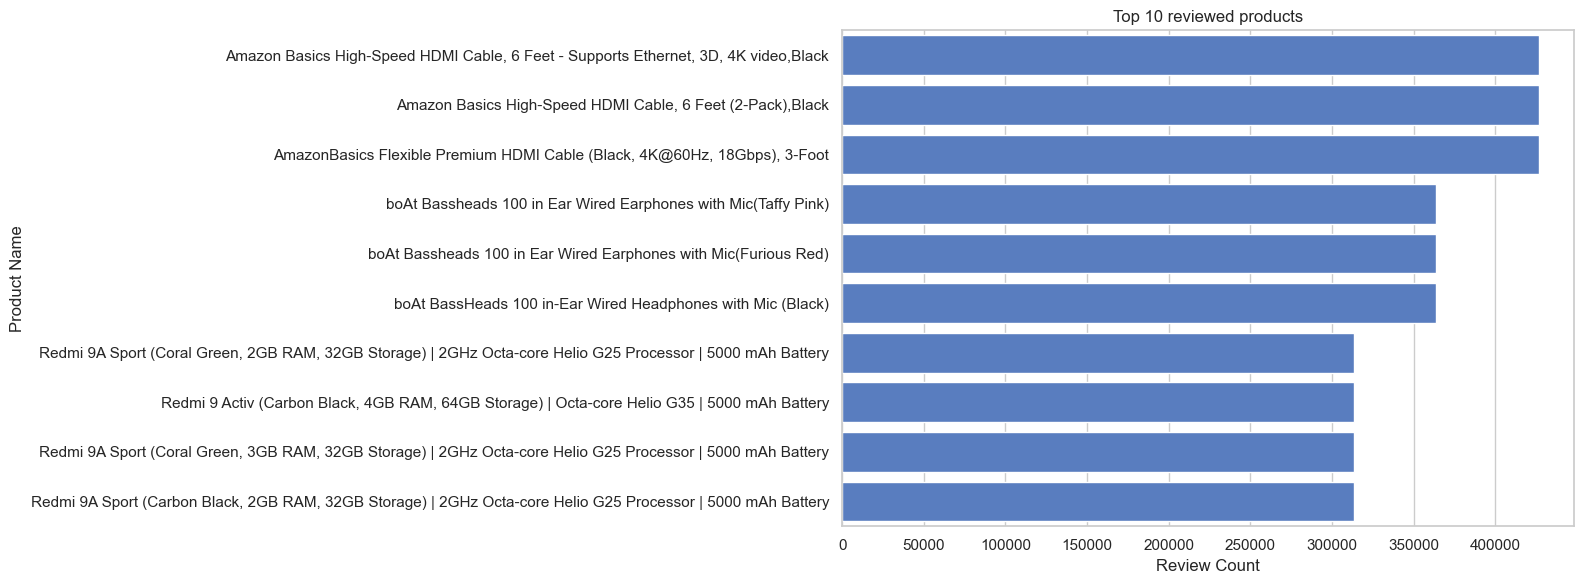

In [81]:
top_10_reviewed_products = df.groupby('product_name').agg({'rating_count':max}).reset_index().rename(columns={'rating_count':'max_rating_count'}).sort_values(by='max_rating_count',ascending=False).head(10)
# top_10_reviewed_products

# Plot
plt.figure(figsize=(16, 6))
sns.barplot(data=top_10_reviewed_products, y='product_name', x='max_rating_count')
plt.title('Top 10 reviewed products')
plt.xlabel('Review Count')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

#### Visualize top 10 Categories by the nummber of products:

1. By Category_level_1:
---

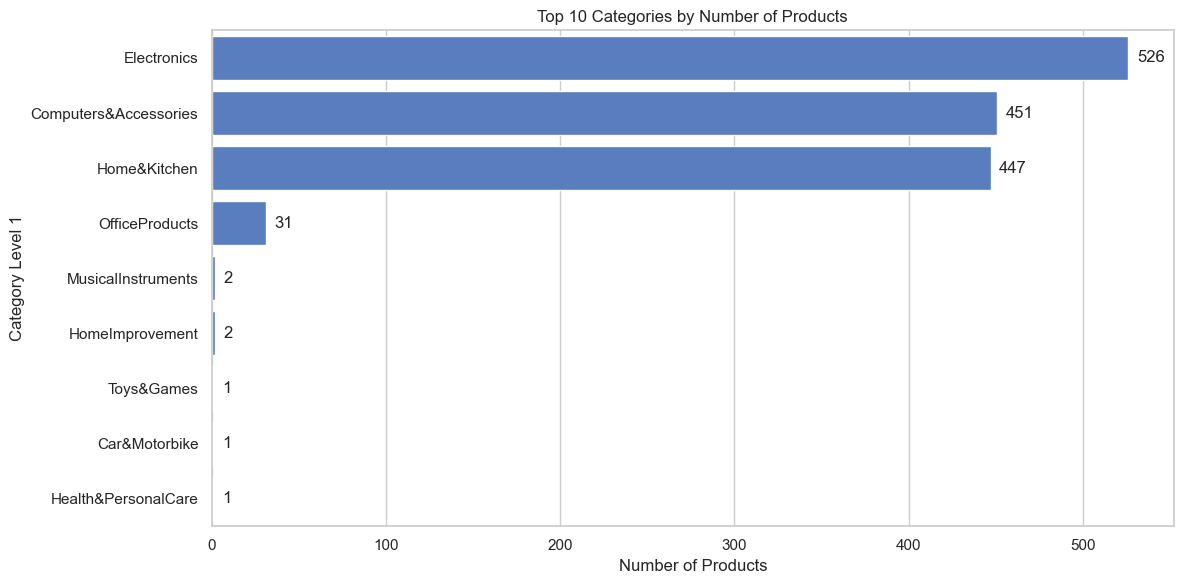

---

2. By Category_last_level:
---

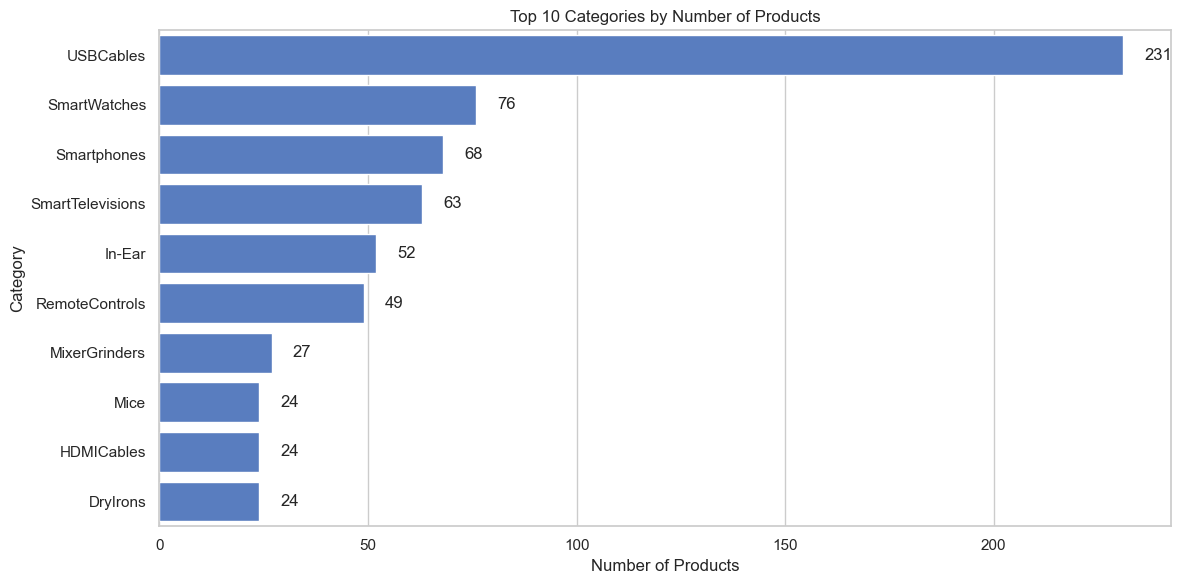

---

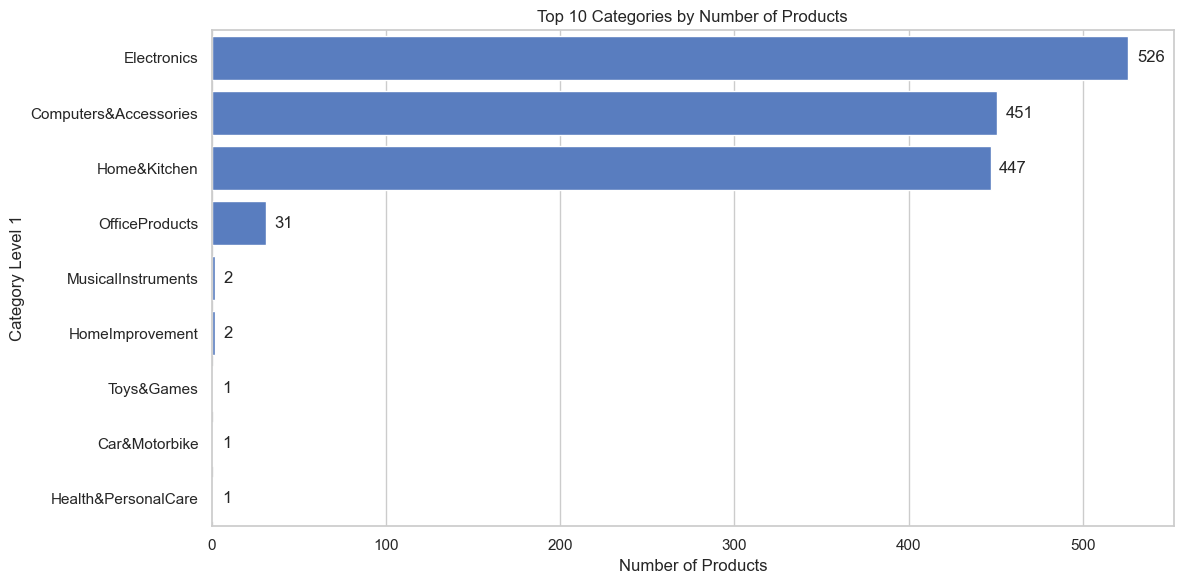

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Get top 10 categories by product count
top_categories = (
    df['category_level_1']
    .value_counts()
    .head(10)
    .reset_index()
    .rename(columns={ 'count': 'product_count'})
)

# display(top_categories)

# Step 2: Plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    data=top_categories,
    x='product_count',
    y='category_level_1',
    # palette='tab10'
)

# Step 3: Add data labels
for i, row in top_categories.iterrows():
    barplot.text(
        row['product_count'] + 5,  # Offset label to the right of the bar
        i,
        f"{int(row['product_count']):,}",  # Add commas to large numbers
        va='center'
    )

# Styling
plt.title('Top 10 Categories by Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Category Level 1')
plt.tight_layout()
plt.show()


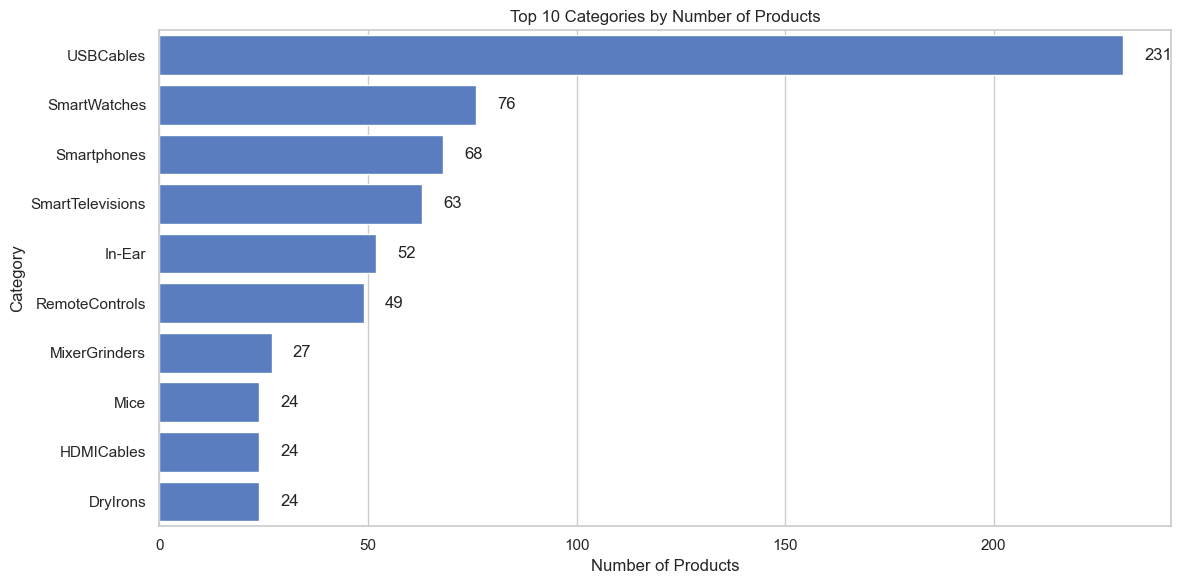

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Get top 10 categories by product count
top_categories = (
    df['category_last_level']
    .value_counts()
    .head(10)
    .reset_index()
    .rename(columns={ 'count': 'product_count'})
)

# display(top_categories)

# Step 2: Plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    data=top_categories,
    x='product_count',
    y='category_last_level',
    # palette='tab10'
)

# Step 3: Add data labels
for i, row in top_categories.iterrows():
    barplot.text(
        row['product_count'] + 5,  # Offset label to the right of the bar
        i,
        f"{int(row['product_count']):,}",  # Add commas to large numbers
        va='center'
    )

# Styling
plt.title('Top 10 Categories by Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


In [84]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'category_level_1',
       'category_level_2', 'category_level_3', 'category_level_4',
       'category_level_5', 'category_level_6', 'category_level_7',
       'category_last_level', 'rating_z_score', 'price_difference',
       'value_for_money_score', 'weighted_rating'],
      dtype='object')

#### Discounts vs actual price correlation

- There is very low negative correlation between the actual price and discount percentage
- Scatter plot to visualize:
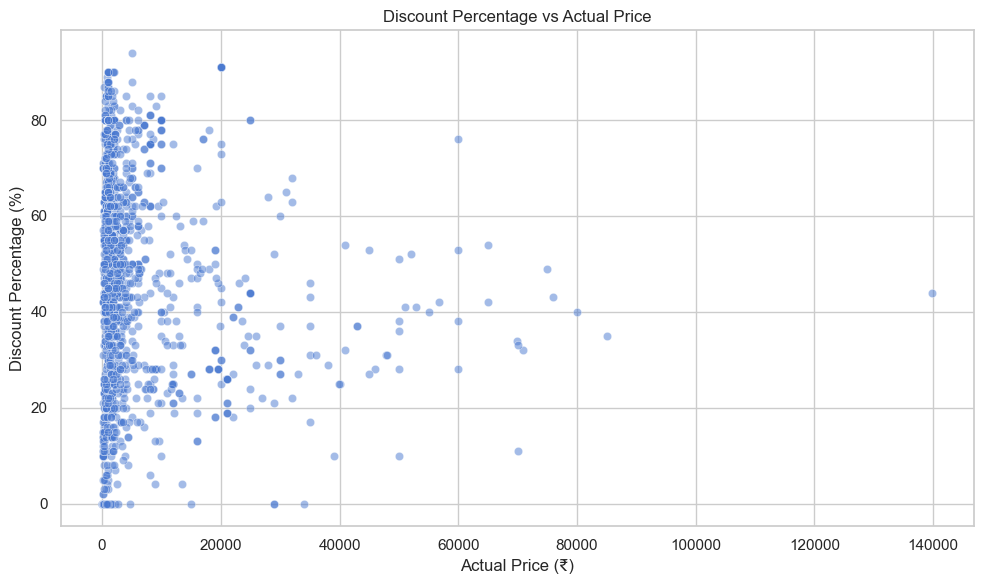

In [85]:
correlation = df['actual_price'].corr(df['discount_percentage'])
print(f'Correlation between actual price and discount percentage is {correlation:.3f}')

Correlation between actual price and discount percentage is -0.118


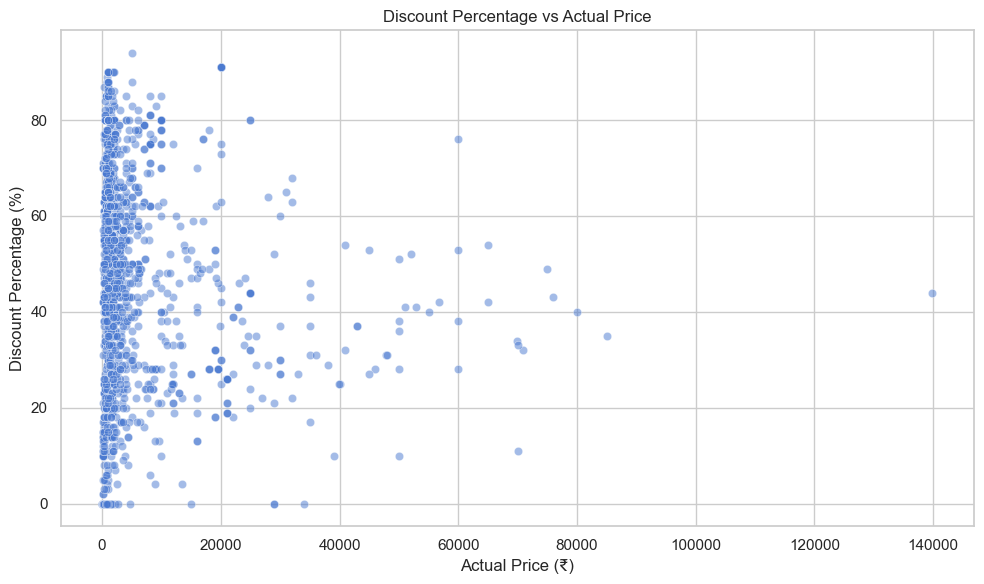

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='actual_price',
    y='discount_percentage',
    alpha=0.5
)
plt.title('Discount Percentage vs Actual Price')
plt.xlabel('Actual Price (₹)')
plt.ylabel('Discount Percentage (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


#### User Engagement Insights:

In [87]:
print('Products with high ratings and low review counts')
products_with_less_ratings = df.groupby('product_name').agg({'rating_count':'max','rating':'mean'}).reset_index().rename(columns={'rating':'mean_rating'}).loc[lambda x:x['mean_rating']>4.5].sort_values(by=['rating_count'],ascending=[True]).head(5)
display(products_with_less_ratings)

Products with high ratings and low review counts


,product_name,rating_count,mean_rating
1047,Syncwire LTG to USB Cable for Fast Charging Co...,5,5.0
666,Melbon VM-905 2000-Watt Room Heater (ISI Certi...,9,4.6
85,Amazon Basics Wireless Mouse | 2.4 GHz Connect...,23,5.0
744,"Oratech Coffee Frother electric, milk frother ...",28,4.8
1238,Zuvexa USB Rechargeable Electric Foam Maker - ...,54,4.7


In [88]:
print('Products with high ratings and high review counts')
products_with_high_Rating_and_Rating_count = df.groupby('product_name').agg({'rating_count':'max','rating':'mean'}).reset_index().rename(columns={'rating':'mean_rating'}).loc[lambda x:x['mean_rating']>4.5].sort_values(by=['rating_count'],ascending=[False]).head(5)
products_with_high_Rating_and_Rating_count

Products with high ratings and high review counts


,product_name,rating_count,mean_rating
1045,Swiffer Instant Electric Water Heater Faucet T...,53803,4.8
885,Redgear MP35 Speed-Type Gaming Mousepad (Black...,33434,4.6
1024,Spigen EZ Fit Tempered Glass Screen Protector ...,26603,4.6
632,"Logitech M331 Silent Plus Wireless Mouse, 2.4G...",12375,4.6
626,Logitech G402 Hyperion Fury USB Wired Gaming M...,10760,4.6


#### Actionable Insights from EDA

- **Boost Visibility for Niche High-Rated Products**  
  Products like *Syncwire LTG Cable* have 4.7+ ratings but few reviews. Promote these via ads or bundling.

- **Focus on High-Demand Categories**  
  Categories like *USB Cables*, *Smartphones*, and *SmartWatches* dominate in volume. Prioritize expansion and inventory optimization here.

- **Refine Discounting Strategy**  
  Weak correlation (-0.118) between actual price and discount suggests that high-priced items aren't consistently more discounted. Use data-driven discounting based on price tiers and demand.

- **Promote High Value-for-Money Products**  
  Products offering strong ratings at low prices should be surfaced more prominently (e.g., *budget electronics*). Ideal for value-conscious shoppers and competitive positioning.

- **Leverage Weighted Rating for Trustworthy Sorting**  
  Use weighted ratings instead of raw ratings to rank products — it better reflects both quality and popularity. This reduces the impact of low-review-count bias.

- **Audit and Review Low Value Products**  
  Identify products with poor value-for-money scores — these may need price adjustment, better product descriptions, or customer feedback analysis to address dissatisfaction.


## Section C: Content-Based Filtering

#### Vectorize product text (about_product + product_name) using:
- TF-IDF or embeddings
- Build a product similarity matrix

In [89]:
# # Choose the product by index (e.g., 0) or use a condition
# index = 0
# print("Product Name:", df.loc[index, 'product_name'])
# print("\nAbout Product:", df.loc[index, 'about_product'])
# print("\nFull Text (product_name + about_product):\n")
# print(df.loc[index, 'text'])


#### Content based recommender based only on product name and about product based on tf-idf vectorizer

In [90]:
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# 1. Prepare stopwords
stop_words = set(stopwords.words('english'))

# 2. Text Preprocessing Function
def preprocess_text(text):
    if pd.isna(text): return ''
    text = text.lower()  # lowercase
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    tokens = word_tokenize(text)  # tokenize
    tokens = [word for word in tokens if word not in stop_words]  # remove stopwords
    return ' '.join(tokens)

# 3. Create category_path and enriched text
df['category_path'] = df[[f'category_level_{i}' for i in range(1, 8)]].fillna('').agg(' > '.join, axis=1)
df['enhanced_text'] = (
    df['product_name'].fillna('') + ' ' +
    df['about_product'].fillna('') + ' ' 
    # df['category_path']
)

# 4. Apply preprocessing
df['clean_text'] = df['enhanced_text'].apply(preprocess_text)

# 5. TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=50000)
tfidf_matrix = tfidf.fit_transform(df['clean_text'])

# 6. Normalize numeric features
# scaler = MinMaxScaler()
# numeric_features = df[['actual_price', 'discount_percentage']].fillna(0)
# normalized_numeric = scaler.fit_transform(numeric_features)

# 7. Combine TF-IDF with numeric vectors
from scipy.sparse import hstack
# final_matrix = hstack([tfidf_matrix, normalized_numeric])

# 8. Cosine Similarity
similarity_matrix = cosine_similarity(tfidf_matrix)


In [91]:
def evaluate_recommendations(index, top_n=1000):
    sim_scores = similarity_matrix[index]
    top_indices = sim_scores.argsort()[::-1][1:top_n + 1]

    # Similarity Metrics
    avg_similarity = sim_scores[top_indices].mean()
    unique_categories = df.loc[top_indices, 'category_last_level'].nunique()
    price_range = df.loc[top_indices, 'actual_price'].max() - df.loc[top_indices, 'actual_price'].min()

    # Input Product Details
    row = df.loc[index]
    product_name = row['product_name']

    # print(f'average similarity: {avg_similarity}')
    # print(f'category_diversity: {unique_categories}')
    # print(f'price_range: {price_range}')
    
    return {
        'product_name': product_name[:40] + ('...' if len(product_name) > 40 else ''),
        'category_level_1': row['category_level_1'],
        'category_last_level': row['category_last_level'],
        'mean_rating': row['rating'],
        'value_for_money': row['value_for_money_score'],
        'weighted_rating': row['weighted_rating'],
        'actual_price': row['actual_price'],
        'discounted_price': row['discounted_price'],
        'avg_similarity': round(avg_similarity, 3),
        'category_diversity': unique_categories,
        'price_range': int(price_range)
    }

# Sample: Evaluate top 5 products by rating count
top_indices = df.sort_values(by='rating_count', ascending=False).head(3).index

evaluation_results = [evaluate_recommendations(idx) for idx in top_indices]
eval_df = pd.DataFrame(evaluation_results)
# display(eval_df)

display(eval_df['avg_similarity'].mean())
# display(eval_df['category_diversity'].mean())

np.float64(0.044333333333333336)

In [92]:
import numpy as np
import pandas as pd

# Step 1: Clean product names for safe lookup
df['product_name'] = df['product_name'].astype(str).str.strip()

# Step 2: Search product index by partial match
query = "Wayona Nylon Braided USB"
matched_idx = df[df['product_name'].str.contains(query, case=False, na=False)].index

if not matched_idx.empty:
    idx = matched_idx[0]  # Take first match

    # Step 3: Get similarity scores from the similarity matrix
    sim_scores = similarity_matrix[idx]

    # Step 4: Get indices of top 5 similar products (excluding the product itself)
    top_indices = np.argsort(sim_scores)[::-1][1:6]

    # Step 5: Create result DataFrame with product name, category, and similarity score
    top_similar_df = pd.DataFrame({
        'product_name': df.loc[top_indices, 'product_name'].values,
        'category': df.loc[top_indices, 'category_last_level'].values,
        'similarity_score': sim_scores[top_indices]
    })

    print(f"\nTop 5 Similar Products to:\n{df.loc[idx, 'product_name']}\n")
    display(top_similar_df)

else:
    print("No matching product found for your query.")



Top 5 Similar Products to:
Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)



,product_name,category,similarity_score
0,Wayona Nylon Braided USB to Lightning Fast Cha...,USBCables,1.000000
1,Wayona Nylon Braided USB to Lightning Fast Cha...,USBCables,1.000000
2,Wayona Nylon Braided Usb Syncing And Charging ...,USBCables,0.964409
3,Wayona Nylon Braided 3A Lightning to USB A Syn...,USBCables,0.907560
4,Wayona Nylon Braided (2 Pack) Lightning Fast U...,USBCables,0.902782


In [107]:
# Helper to get last non-null category level
def get_last_category(row):
    category_cols = [f'category_level_{i}' for i in range(1, 8)]
    return next((row[col] for col in reversed(category_cols) if pd.notnull(row[col])), None)

# Get top N similar products for a given product index
def get_top_similar_products(product_index, top_n=5):
    sim_scores = similarity_matrix[product_index]
    top_indices = np.argsort(sim_scores)[::-1][1:top_n + 1]  # Exclude self-match

    result = df.loc[top_indices].copy()
    result['similarity_score'] = sim_scores[top_indices]
    result['category_last_level'] = result.apply(get_last_category, axis=1)

    return result[['product_name', 'category_level_1', 'category_last_level', 'similarity_score','actual_price']]


In [115]:
# Recommendations for products with less ratings
print("Recommendations for High-Rated Products with Low Review Counts")
for idx in products_with_less_ratings.index:
    input_product = df.loc[idx]
    input_last_cat = get_last_category(input_product)

    print(f"\nInput Product: {input_product['product_name']}")
    print(f"Category Level 1: {input_product['category_level_1']}")
    print(f"Last Category Level: {input_last_cat}")
    print(f"Input product's actual price {input_product['actual_price']}")

    display(get_top_similar_products(idx))

Recommendations for High-Rated Products with Low Review Counts

Input Product: Lifelong LLQH922 Regalia 800 W (ISI Certified) Quartz Room Heater with 2 Power settings, Overheating Protection, 2 Rod Heater (1 Year Warranty, White)
Category Level 1: Home&Kitchen
Last Category Level: ElectricHeaters
Input product's actual price 2000.0


,product_name,category_level_1,category_last_level,similarity_score,actual_price
1068,Lifelong LLQH925 Dyno Quartz Heater 2 Power se...,Home&Kitchen,ElectricHeaters,0.992415,2400.0
1021,USHA Quartz Room Heater with Overheating Prote...,Home&Kitchen,ElectricHeaters,0.973530,1695.0
1225,Usha IH2415 1500-Watt Immersion Heater (Silver),Home&Kitchen,ImmersionRods,0.961622,640.0
1098,Maharaja Whiteline Lava Neo 1200-Watts Halogen...,Home&Kitchen,RoomHeaters,0.961248,5000.0
1357,Kenstar 2400 Watts 9 Fins Oil Filled Radiator ...,Home&Kitchen,FanHeaters,0.961225,11990.0



Input Product: MI Usb Type-C Cable Smartphone (Black)
Category Level 1: Computers&Accessories
Last Category Level: USBCables
Input product's actual price 299.0


,product_name,category_level_1,category_last_level,similarity_score,actual_price
7,MI Usb Type-C Cable Smartphone (Black),Computers&Accessories,USBCables,1.000000,299.0
666,MI Usb Type-C Cable Smartphone (Black),Computers&Accessories,USBCables,1.000000,299.0
481,Mi 10W Wall Charger for Mobile Phones with Mic...,Electronics,WallChargers,0.954680,599.0
277,Amazon Brand - Solimo 3A Fast Charging Tough T...,Computers&Accessories,USBCables,0.949557,299.0
196,FLiX (Beetel) USB to iPhone Lightning Textured...,Computers&Accessories,USBCables,0.949142,249.0



Input Product: OnePlus 108 cm (43 inches) Y Series 4K Ultra HD Smart Android LED TV 43Y1S Pro (Black)
Category Level 1: Electronics
Last Category Level: SmartTelevisions
Input product's actual price 39999.0


,product_name,category_level_1,category_last_level,similarity_score,actual_price
38,OnePlus 126 cm (50 inches) Y Series 4K Ultra H...,Electronics,SmartTelevisions,0.996382,45999.0
91,OnePlus 108 cm (43 inches) Y Series Full HD Sm...,Electronics,SmartTelevisions,0.995462,31999.0
57,OnePlus 80 cm (32 inches) Y Series HD Ready Sm...,Electronics,SmartTelevisions,0.994709,21999.0
26,OnePlus 80 cm (32 inches) Y Series HD Ready LE...,Electronics,SmartTelevisions,0.993113,19999.0
291,Hisense 126 cm (50 inches) Bezelless Series 4K...,Electronics,SmartTelevisions,0.990829,54990.0



Input Product: Zebronics Zeb Buds C2 in Ear Type C Wired Earphones with Mic, Braided 1.2 Metre Cable, Metallic Design, 10mm Drivers, in Line Mic & Volume Controller (Blue)
Category Level 1: Electronics
Last Category Level: In-Ear
Input product's actual price 699.0


,product_name,category_level_1,category_last_level,similarity_score,actual_price
758,boAt Bassheads 225 in Ear Wired Earphones with...,Electronics,In-Ear,0.971549,999.0
904,Hp Wired On Ear Headphones With Mic With 3.5 M...,Computers&Accessories,PCHeadsets,0.964376,999.0
706,"JBL C200SI, Premium in Ear Wired Earphones wit...",Electronics,In-Ear,0.964035,1499.0
477,"JBL C100SI Wired In Ear Headphones with Mic, J...",Electronics,In-Ear,0.957328,1299.0
751,"Infinity (JBL Fuze Pint, Wireless Ultra Portab...",Electronics,OutdoorSpeakers,0.956802,1999.0



Input Product: Wonderchef Nutri-blend Mixer, Grinder & Blender | Powerful 400W 22000 RPM motor | Stainless steel Blades | 3 unbreakable jars | 2 Years warranty | Online recipe book by Chef Sanjeev Kapoor | Black
Category Level 1: Home&Kitchen
Last Category Level: MixerGrinders
Input product's actual price 5500.0


,product_name,category_level_1,category_last_level,similarity_score,actual_price
1191,Wonderchef Nutri-blend Complete Kitchen Machin...,Home&Kitchen,JuicerMixerGrinders,0.993318,6500.0
1079,"Wonderchef Nutri-blend Mixer, Grinder & Blende...",Home&Kitchen,JuicerMixerGrinders,0.991107,5000.0
1382,VAPJA® Portable Mini Juicer Cup Blender USB Re...,Home&Kitchen,JuicerMixerGrinders,0.979040,999.0
1246,Tesora - Inspired by you Large Premium Electri...,Home&Kitchen,Kettle&ToasterSets,0.978093,1850.0
1340,Inalsa Hand Blender| Hand Mixer|Beater - Easy ...,Home&Kitchen,HandMixers,0.977526,1395.0


In [117]:
# Recommendations for popular and high-rated products
print("\nRecommendations for Popular & High-Rated Products")
for idx in products_with_high_Rating_and_Rating_count.index:
    input_product = df.loc[idx]
    input_last_cat = get_last_category(input_product)

    print(f"\nInput Product: {input_product['product_name']}")
    print(f"Category Level 1: {input_product['category_level_1']}")
    print(f"Last Category Level: {input_last_cat}")
    print(f"Input product's actual price {input_product['actual_price']}")

    display(get_top_similar_products(idx))



Recommendations for Popular & High-Rated Products

Input Product: Bajaj Rex 500W Mixer Grinder with Nutri-Pro Feature, 3 Jars, White
Category Level 1: Home&Kitchen
Last Category Level: MixerGrinders
Input product's actual price 3210.0


,product_name,category_level_1,category_last_level,similarity_score,actual_price
1066,"Butterfly Jet Elite Mixer Grinder, 750W, 4 Jar...",Home&Kitchen,MixerGrinders,0.987384,5795.0
1349,"Butterfly Hero Mixer Grinder, 500W, 3 Jars (Grey)",Home&Kitchen,MixerGrinders,0.982299,3899.0
1193,Morphy Richards Icon Superb 750W Mixer Grinder...,Home&Kitchen,MixerGrinders,0.982037,7795.0
1112,"Philips HL7756/00 Mixer Grinder, 750W, 3 Jars ...",Home&Kitchen,MixerGrinders,0.980322,4295.0
1131,"Butterfly Smart Mixer Grinder, 750W, 4 Jars (G...",Home&Kitchen,MixerGrinders,0.979365,4999.0



Input Product: Camel Artist Acrylic Color Box - 9ml Tubes, 12 Shades
Category Level 1: Home&Kitchen
Last Category Level: Paints
Input product's actual price 310.0


,product_name,category_level_1,category_last_level,similarity_score,actual_price
902,"Camel Fabrica Acrylic Ultra Color - 15ml each,...",Home&Kitchen,Paints,0.923490,230.0
1301,Preethi MGA-502 0.4-Litre Grind and Store Jar ...,Home&Kitchen,StandMixerAccessories,0.906996,635.0
1002,Parker Moments Vector Timecheck Gold Trim Roll...,OfficeProducts,LiquidInkRollerballPens,0.904577,420.0
876,Parker Quink Ink Bottle (Black),OfficeProducts,BottledInk,0.900457,100.0
1118,Pigeon Kessel Multipurpose Kettle (12173) 1.2 ...,Home&Kitchen,ElectricKettles,0.893922,1775.0



Input Product: beatXP Kitchen Scale Multipurpose Portable Electronic Digital Weighing Scale | Weight Machine With Back light LCD Display | White |10 kg | 2 Year Warranty |
Category Level 1: Home&Kitchen
Last Category Level: DigitalKitchenScales
Input product's actual price 1999.0


,product_name,category_level_1,category_last_level,similarity_score,actual_price
1025,Glun Multipurpose Portable Electronic Digital ...,Home&Kitchen,DigitalKitchenScales,0.968367,499.0
1265,Gadgetronics Digital Kitchen Weighing Scale & ...,Home&Kitchen,DigitalKitchenScales,0.963929,2999.0
653,"Boult Audio FXCharge with ENC, 32H Playtime, 5...",Electronics,In-Ear,0.963598,4499.0
1360,Candes BlowHot All in One Silent Blower Fan Ro...,Home&Kitchen,FanHeaters,0.963253,2999.0
383,Fire-Boltt Phoenix Smart Watch with Bluetooth ...,Electronics,SmartWatches,0.962749,9999.0



Input Product: boAt Xtend Smartwatch with Alexa Built-in, 1.69” HD Display, Multiple Watch Faces, Stress Monitor, Heart & SpO2 Monitoring, 14 Sports Modes, Sleep Monitor, 5 ATM & 7 Days Battery(Charcoal Black)
Category Level 1: Electronics
Last Category Level: SmartWatches
Input product's actual price 7990.0


,product_name,category_level_1,category_last_level,similarity_score,actual_price
393,"boAt Xtend Smartwatch with Alexa Built-in, 1.6...",Electronics,SmartWatches,1.000000,7990.0
675,"boAt Xtend Smartwatch with Alexa Built-in, 1.6...",Electronics,SmartWatches,0.999430,7990.0
418,"boAt Xtend Smartwatch with Alexa Built-in, 1.6...",Electronics,SmartWatches,0.999430,7990.0
702,Fire-Boltt Ring 3 Smart Watch 1.8 Biggest Disp...,Electronics,SmartWatches,0.989794,9999.0
472,Fire-Boltt Ring 3 Smart Watch 1.8 Biggest Disp...,Electronics,SmartWatches,0.989794,9999.0



Input Product: boAt Deuce USB 300 2 in 1 Type-C & Micro USB Stress Resistant, Tangle-Free, Sturdy Cable with 3A Fast Charging & 480mbps Data Transmission, 10000+ Bends Lifespan and Extended 1.5m Length(Martian Red)
Category Level 1: Computers&Accessories
Last Category Level: USBCables
Input product's actual price 699.0


,product_name,category_level_1,category_last_level,similarity_score,actual_price
390,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories,USBCables,1.000000,699.0
626,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories,USBCables,1.000000,699.0
92,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories,USBCables,0.999441,699.0
113,"boAt Type C A750 Stress Resistant, Tangle-free...",Computers&Accessories,USBCables,0.989727,999.0
416,"boAt Micro USB 55 Tangle-free, Sturdy Micro US...",Computers&Accessories,USBCables,0.989617,499.0


#### Content based filtering based on about product, product name, category with tf-idf vectorizer actual price and discount rate normalized

In [119]:
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# 1. Prepare stopwords
stop_words = set(stopwords.words('english'))

# 2. Text Preprocessing Function
def preprocess_text(text):
    if pd.isna(text): return ''
    text = text.lower()  # lowercase
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    tokens = word_tokenize(text)  # tokenize
    tokens = [word for word in tokens if word not in stop_words]  # remove stopwords
    return ' '.join(tokens)

# 3. Create category_path and enriched text
df['category_path'] = df[[f'category_level_{i}' for i in range(1, 8)]].fillna('').agg(' > '.join, axis=1)
df['enhanced_text'] = (
    df['product_name'].fillna('') + ' ' +
    df['about_product'].fillna('') + ' ' +
    df['category_path']
)

# 4. Apply preprocessing
df['clean_text'] = df['enhanced_text'].apply(preprocess_text)

# 5. TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=50000)
tfidf_matrix = tfidf.fit_transform(df['clean_text'])

# 6. Normalize numeric features
scaler = MinMaxScaler()
numeric_features = df[['actual_price', 'discount_percentage']].fillna(0)
normalized_numeric = scaler.fit_transform(numeric_features)

# 7. Combine TF-IDF with numeric vectors
from scipy.sparse import hstack
final_matrix = hstack([tfidf_matrix, normalized_numeric])

# 8. Cosine Similarity
similarity_matrix = cosine_similarity(final_matrix)


In [120]:
def recommend_similar_products_by_index(index, top_n=5):
    sim_scores = similarity_matrix[index]
    top_indices = sim_scores.argsort()[::-1][1:top_n + 1]

    result = df.loc[top_indices, [
        'product_name', 'category_level_1', 'category_last_level',
        'actual_price', 'discounted_price', 'discount_percentage'
    ]].copy()
    result['similarity_score'] = sim_scores[top_indices]
    return result.reset_index(drop=True)


In [121]:
def evaluate_recommendations(index, top_n=1000):
    sim_scores = similarity_matrix[index]
    top_indices = sim_scores.argsort()[::-1][1:top_n + 1]

    # Similarity Metrics
    avg_similarity = sim_scores[top_indices].mean()
    unique_categories = df.loc[top_indices, 'category_last_level'].nunique()
    price_range = df.loc[top_indices, 'actual_price'].max() - df.loc[top_indices, 'actual_price'].min()

    # Input Product Details
    row = df.loc[index]
    product_name = row['product_name']

    # print(f'average similarity: {avg_similarity}')
    # print(f'category_diversity: {unique_categories}')
    # print(f'price_range: {price_range}')
    
    return {
        'product_name': product_name[:40] + ('...' if len(product_name) > 40 else ''),
        'category_level_1': row['category_level_1'],
        'category_last_level': row['category_last_level'],
        'mean_rating': row['rating'],
        'value_for_money': row['value_for_money_score'],
        'weighted_rating': row['weighted_rating'],
        'actual_price': row['actual_price'],
        'discounted_price': row['discounted_price'],
        'avg_similarity': round(avg_similarity, 3),
        'category_diversity': unique_categories,
        'price_range': int(price_range)
    }

# Sample: Evaluate top 5 products by rating count
top_indices = df.sort_values(by='rating_count', ascending=False).head(3).index

evaluation_results = [evaluate_recommendations(idx) for idx in top_indices]
eval_df = pd.DataFrame(evaluation_results)
# display(eval_df)

display(eval_df['avg_similarity'].mean())


np.float64(0.3053333333333333)

In [122]:
# Recommendations for products with less ratings
print("Recommendations for High-Rated Products with Low Review Counts")
for idx in products_with_less_ratings.index:
    input_product = df.loc[idx]
    input_last_cat = get_last_category(input_product)

    print(f"\nInput Product: {input_product['product_name']}")
    print(f"Category Level 1: {input_product['category_level_1']}")
    print(f"Last Category Level: {input_last_cat}")
    print(f"Input product's actual price {input_product['actual_price']}")

    display(get_top_similar_products(idx))

Recommendations for High-Rated Products with Low Review Counts

Input Product: Lifelong LLQH922 Regalia 800 W (ISI Certified) Quartz Room Heater with 2 Power settings, Overheating Protection, 2 Rod Heater (1 Year Warranty, White)
Category Level 1: Home&Kitchen
Last Category Level: ElectricHeaters
Input product's actual price 2000.0


,product_name,category_level_1,category_last_level,similarity_score,actual_price
1068,Lifelong LLQH925 Dyno Quartz Heater 2 Power se...,Home&Kitchen,ElectricHeaters,0.899653,2400.0
1021,USHA Quartz Room Heater with Overheating Prote...,Home&Kitchen,ElectricHeaters,0.555628,1695.0
1341,"Longway Blaze 2 Rod Quartz Room Heater (White,...",Home&Kitchen,ElectricHeaters,0.516953,2199.0
1216,Eopora PTC Ceramic Fast Heating Room Heater fo...,Home&Kitchen,ElectricHeaters,0.511753,2999.0
1072,"Lifelong LLFH921 Regalia 2000 W Fan Heater, 3 ...",Home&Kitchen,FanHeaters,0.509661,2000.0



Input Product: MI Usb Type-C Cable Smartphone (Black)
Category Level 1: Computers&Accessories
Last Category Level: USBCables
Input product's actual price 299.0


,product_name,category_level_1,category_last_level,similarity_score,actual_price
420,MI Usb Type-C Cable Smartphone (Black),Computers&Accessories,USBCables,1.000000,299.0
666,MI Usb Type-C Cable Smartphone (Black),Computers&Accessories,USBCables,1.000000,299.0
834,pTron Solero T351 3.5Amps Fast Charging Type-C...,Computers&Accessories,USBCables,0.419803,999.0
34,pTron Solero T351 3.5Amps Fast Charging Type-C...,Computers&Accessories,USBCables,0.419803,999.0
284,pTron Solero T241 2.4A Type-C Data & Charging ...,Computers&Accessories,USBCables,0.416957,800.0



Input Product: OnePlus 108 cm (43 inches) Y Series 4K Ultra HD Smart Android LED TV 43Y1S Pro (Black)
Category Level 1: Electronics
Last Category Level: SmartTelevisions
Input product's actual price 39999.0


,product_name,category_level_1,category_last_level,similarity_score,actual_price
38,OnePlus 126 cm (50 inches) Y Series 4K Ultra H...,Electronics,SmartTelevisions,0.900550,45999.0
91,OnePlus 108 cm (43 inches) Y Series Full HD Sm...,Electronics,SmartTelevisions,0.895206,31999.0
57,OnePlus 80 cm (32 inches) Y Series HD Ready Sm...,Electronics,SmartTelevisions,0.887140,21999.0
26,OnePlus 80 cm (32 inches) Y Series HD Ready LE...,Electronics,SmartTelevisions,0.668689,19999.0
216,OnePlus 138.7 cm (55 inches) U Series 4K LED S...,Electronics,SmartTelevisions,0.660487,59999.0



Input Product: Zebronics Zeb Buds C2 in Ear Type C Wired Earphones with Mic, Braided 1.2 Metre Cable, Metallic Design, 10mm Drivers, in Line Mic & Volume Controller (Blue)
Category Level 1: Electronics
Last Category Level: In-Ear
Input product's actual price 699.0


,product_name,category_level_1,category_last_level,similarity_score,actual_price
406,"PTron Boom Ultima 4D Dual Driver, in-Ear Gamin...",Electronics,In-Ear,0.448877,1900.0
607,Boult Audio BassBuds X1 in-Ear Wired Earphones...,Electronics,In-Ear,0.417443,999.0
595,ZEBRONICS Zeb-Bro in Ear Wired Earphones with ...,Electronics,In-Ear,0.404993,399.0
811,ZEBRONICS Zeb-Evolve Wireless in Ear Neckband ...,Electronics,In-Ear,0.397561,1499.0
836,ZEBRONICS Zeb-Buds 30 3.5Mm Stereo Wired in Ea...,Electronics,In-Ear,0.390154,499.0



Input Product: Wonderchef Nutri-blend Mixer, Grinder & Blender | Powerful 400W 22000 RPM motor | Stainless steel Blades | 3 unbreakable jars | 2 Years warranty | Online recipe book by Chef Sanjeev Kapoor | Black
Category Level 1: Home&Kitchen
Last Category Level: MixerGrinders
Input product's actual price 5500.0


,product_name,category_level_1,category_last_level,similarity_score,actual_price
1191,Wonderchef Nutri-blend Complete Kitchen Machin...,Home&Kitchen,JuicerMixerGrinders,0.752943,6500.0
1079,"Wonderchef Nutri-blend Mixer, Grinder & Blende...",Home&Kitchen,JuicerMixerGrinders,0.602254,5000.0
1424,Activa Easy Mix Nutri Mixer Grinder 500 Watt |...,Home&Kitchen,MixerGrinders,0.364323,2990.0
2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories,USBCables,0.349975,1899.0
1129,Preethi Blue Leaf Diamond MG-214 mixer grinder...,Home&Kitchen,MixerGrinders,0.348246,9455.0


In [124]:
# Recommendations for popular and high-rated products
print("\nRecommendations for Popular & High-Rated Products")
for idx in products_with_high_Rating_and_Rating_count.index:
    input_product = df.loc[idx]
    input_last_cat = get_last_category(input_product)

    print(f"\nInput Product: {input_product['product_name']}")
    print(f"Category Level 1: {input_product['category_level_1']}")
    print(f"Last Category Level: {input_last_cat}")
    print(f"Input product's actual price {input_product['actual_price']}")

    display(get_top_similar_products(idx))



Recommendations for Popular & High-Rated Products

Input Product: Bajaj Rex 500W Mixer Grinder with Nutri-Pro Feature, 3 Jars, White
Category Level 1: Home&Kitchen
Last Category Level: MixerGrinders
Input product's actual price 3210.0


,product_name,category_level_1,category_last_level,similarity_score,actual_price
1193,Morphy Richards Icon Superb 750W Mixer Grinder...,Home&Kitchen,MixerGrinders,0.680671,7795.0
1349,"Butterfly Hero Mixer Grinder, 500W, 3 Jars (Grey)",Home&Kitchen,MixerGrinders,0.659445,3899.0
1066,"Butterfly Jet Elite Mixer Grinder, 750W, 4 Jar...",Home&Kitchen,MixerGrinders,0.657273,5795.0
1128,Prestige Iris 750 Watt Mixer Grinder with 3 St...,Home&Kitchen,MixerGrinders,0.605615,6295.0
1131,"Butterfly Smart Mixer Grinder, 750W, 4 Jars (G...",Home&Kitchen,MixerGrinders,0.592504,4999.0



Input Product: Camel Artist Acrylic Color Box - 9ml Tubes, 12 Shades
Category Level 1: Home&Kitchen
Last Category Level: Paints
Input product's actual price 310.0


,product_name,category_level_1,category_last_level,similarity_score,actual_price
902,"Camel Fabrica Acrylic Ultra Color - 15ml each,...",Home&Kitchen,Paints,0.633689,230.0
982,Camel Oil Pastel with Reusable Plastic Box - 5...,Home&Kitchen,PaintingMaterials,0.351141,230.0
650,PIDILITE Fevicryl Acrylic Colours Sunflower Ki...,Home&Kitchen,Paints,0.285402,225.0
1380,TTK Prestige Limited Orion Mixer Grinder 500 W...,Home&Kitchen,MixerGrinders,0.132215,3895.0
893,Classmate Octane Colour Burst-Multicolour Gel ...,Home&Kitchen,Pens,0.115042,100.0



Input Product: beatXP Kitchen Scale Multipurpose Portable Electronic Digital Weighing Scale | Weight Machine With Back light LCD Display | White |10 kg | 2 Year Warranty |
Category Level 1: Home&Kitchen
Last Category Level: DigitalKitchenScales
Input product's actual price 1999.0


,product_name,category_level_1,category_last_level,similarity_score,actual_price
1386,Themisto TH-WS20 Digital Kitchen Weighing Scal...,Home&Kitchen,DigitalKitchenScales,0.735505,1999.0
1178,Venus Digital Kitchen Weighing Scale & Food We...,Home&Kitchen,DigitalKitchenScales,0.705126,2799.0
1025,Glun Multipurpose Portable Electronic Digital ...,Home&Kitchen,DigitalKitchenScales,0.668038,499.0
1265,Gadgetronics Digital Kitchen Weighing Scale & ...,Home&Kitchen,DigitalKitchenScales,0.643772,2999.0
1245,Dr Trust Electronic Kitchen Digital Scale Weig...,Health&PersonalCare,DigitalBathroomScales,0.587085,1900.0



Input Product: boAt Xtend Smartwatch with Alexa Built-in, 1.69” HD Display, Multiple Watch Faces, Stress Monitor, Heart & SpO2 Monitoring, 14 Sports Modes, Sleep Monitor, 5 ATM & 7 Days Battery(Charcoal Black)
Category Level 1: Electronics
Last Category Level: SmartWatches
Input product's actual price 7990.0


,product_name,category_level_1,category_last_level,similarity_score,actual_price
632,"boAt Xtend Smartwatch with Alexa Built-in, 1.6...",Electronics,SmartWatches,1.000000,7990.0
418,"boAt Xtend Smartwatch with Alexa Built-in, 1.6...",Electronics,SmartWatches,0.990074,7990.0
675,"boAt Xtend Smartwatch with Alexa Built-in, 1.6...",Electronics,SmartWatches,0.990074,7990.0
455,"boAt Wave Lite Smartwatch with 1.69"" HD Displa...",Electronics,SmartWatches,0.585893,6990.0
494,boAt Wave Lite Smartwatch with 1.69 Inches(4.2...,Electronics,SmartWatches,0.582669,6990.0



Input Product: boAt Deuce USB 300 2 in 1 Type-C & Micro USB Stress Resistant, Tangle-Free, Sturdy Cable with 3A Fast Charging & 480mbps Data Transmission, 10000+ Bends Lifespan and Extended 1.5m Length(Martian Red)
Category Level 1: Computers&Accessories
Last Category Level: USBCables
Input product's actual price 699.0


,product_name,category_level_1,category_last_level,similarity_score,actual_price
626,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories,USBCables,1.000000,699.0
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories,USBCables,1.000000,699.0
92,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories,USBCables,0.972957,699.0
113,"boAt Type C A750 Stress Resistant, Tangle-free...",Computers&Accessories,USBCables,0.762936,999.0
983,"boAt Type C A750 Stress Resistant, Tangle-free...",Computers&Accessories,USBCables,0.758368,999.0


In [101]:
# ! pip install --upgrade pip setuptools wheel
# ! pip install --upgrade numpy
# ! pip install --force-reinstall --no-cache-dir spacy

# ! pip uninstall -y spacy numpy cymem preshed thinc murmurhash

# ! pip install --upgrade numpy

# ! pip install --no-binary :all: --no-cache-dir spacy

# ! python -m spacy download en_core_web_md



# ! pip install spacy
# ! python -m spacy download en_core_web_md


#### Content based filtering based on about product, category, product name with spacy embeddings and actual price and discount percentage normalized

In [129]:
import spacy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

# Load spaCy model with word vectors
nlp = spacy.load("en_core_web_md")  # NOT 'sm' — use 'md' or 'lg' for vectors

# 1. Create category path and enhanced text
df['category_path'] = df[[f'category_level_{i}' for i in range(1, 8)]].fillna('').agg(' > '.join, axis=1)
df['enhanced_text'] = (
    df['product_name'].fillna('') + ' ' +
    df['about_product'].fillna('') + ' ' +
    df['category_path']
)

# 2. Convert each text to embedding vector using spaCy
def get_spacy_vector(text):
    if pd.isna(text) or not text.strip():
        return np.zeros(nlp.vocab.vectors_length)
    doc = nlp(text)
    return doc.vector

# df['clean_text'] = df['enhanced_text'].apply(preprocess_text)
# 3. Apply vectorization
embedding_matrix = np.vstack(df['enhanced_text'].apply(preprocess_text).apply(get_spacy_vector).values)

# 4. Normalize numeric features
scaler = MinMaxScaler()
numeric_features = df[['actual_price', 'discount_percentage']].fillna(0)
normalized_numeric = scaler.fit_transform(numeric_features)

# 5. Concatenate embeddings with numeric features
final_matrix = np.hstack([embedding_matrix, normalized_numeric])

# 6. Compute cosine similarity
similarity_matrix = cosine_similarity(final_matrix)


In [131]:
# embedding_matrix

In [127]:
# def evaluate_recommendations(index, top_n=1000):
#     sim_scores = similarity_matrix[index]
#     top_indices = sim_scores.argsort()[::-1][1:top_n + 1]

#     # Similarity Metrics
#     avg_similarity = sim_scores[top_indices].mean()
#     unique_categories = df.loc[top_indices, 'category_last_level'].nunique()
#     price_range = df.loc[top_indices, 'actual_price'].max() - df.loc[top_indices, 'actual_price'].min()

#     # Input Product Details
#     row = df.loc[index]
#     product_name = row['product_name']

#     # print(f'average similarity: {avg_similarity}')
#     # print(f'category_diversity: {unique_categories}')
#     # print(f'price_range: {price_range}')
    
#     return {
#         'product_name': product_name[:40] + ('...' if len(product_name) > 40 else ''),
#         'category_level_1': row['category_level_1'],
#         'category_last_level': row['category_last_level'],
#         'mean_rating': row['rating'],
#         'value_for_money': row['value_for_money_score'],
#         'weighted_rating': row['weighted_rating'],
#         'actual_price': row['actual_price'],
#         'discounted_price': row['discounted_price'],
#         'avg_similarity': round(avg_similarity, 3),
#         'category_diversity': unique_categories,
#         'price_range': int(price_range)
#     }

# # Sample: Evaluate top 5 products by rating count
# top_indices = df.sort_values(by='rating_count', ascending=False).head(3).index

# evaluation_results = [evaluate_recommendations(idx) for idx in top_indices]
# eval_df = pd.DataFrame(evaluation_results)
# display(eval_df)

In [128]:
# def show_product_info(index):
#     row = df.loc[index]
#     return {
#         'product_name': row['product_name'],
#         'category_level_1': row['category_level_1'],
#         'category_last_level': row['category_last_level'],
#         'mean_rating': row['rating'],
#         'value_for_money': row['value_for_money_score'],
#         'weighted_rating': row['weighted_rating'],
#         'actual_price': row['actual_price'],
#         'discounted_price': row['discounted_price']
#     }

# # Example usage for index 0
# product_info = show_product_info(0)
# display(pd.DataFrame([product_info]))

def evaluate_recommendations(index, top_n=1000):
    sim_scores = similarity_matrix[index]
    top_indices = sim_scores.argsort()[::-1][1:top_n + 1]

    # Similarity Metrics
    avg_similarity = sim_scores[top_indices].mean()
    unique_categories = df.loc[top_indices, 'category_last_level'].nunique()
    price_range = df.loc[top_indices, 'actual_price'].max() - df.loc[top_indices, 'actual_price'].min()

    # Input Product Details
    row = df.loc[index]
    product_name = row['product_name']

    # print(f'average similarity: {avg_similarity}')
    # print(f'category_diversity: {unique_categories}')
    # print(f'price_range: {price_range}')
    
    return {
        'product_name': product_name[:40] + ('...' if len(product_name) > 40 else ''),
        'category_level_1': row['category_level_1'],
        'category_last_level': row['category_last_level'],
        'mean_rating': row['rating'],
        'value_for_money': row['value_for_money_score'],
        'weighted_rating': row['weighted_rating'],
        'actual_price': row['actual_price'],
        'discounted_price': row['discounted_price'],
        'avg_similarity': round(avg_similarity, 3),
        'category_diversity': unique_categories,
        'price_range': int(price_range)
    }

# Sample: Evaluate top 5 products by rating count
top_indices = df.sort_values(by='rating_count', ascending=False).head(3).index

evaluation_results = [evaluate_recommendations(idx) for idx in top_indices]
eval_df = pd.DataFrame(evaluation_results)
# display(eval_df)

display(eval_df['avg_similarity'].mean())


np.float64(0.94)

In [132]:
# Recommendations for products with less ratings
print("Recommendations for High-Rated Products with Low Review Counts")
for idx in products_with_less_ratings.index:
    input_product = df.loc[idx]
    input_last_cat = get_last_category(input_product)

    print(f"\nInput Product: {input_product['product_name']}")
    print(f"Category Level 1: {input_product['category_level_1']}")
    print(f"Last Category Level: {input_last_cat}")
    print(f"Actual price: {input_product['actual_price']}")

    display(get_top_similar_products(idx))

Recommendations for High-Rated Products with Low Review Counts

Input Product: Lifelong LLQH922 Regalia 800 W (ISI Certified) Quartz Room Heater with 2 Power settings, Overheating Protection, 2 Rod Heater (1 Year Warranty, White)
Category Level 1: Home&Kitchen
Last Category Level: ElectricHeaters
Actual price: 2000.0


,product_name,category_level_1,category_last_level,similarity_score,actual_price
1068,Lifelong LLQH925 Dyno Quartz Heater 2 Power se...,Home&Kitchen,ElectricHeaters,0.983808,2400.0
1021,USHA Quartz Room Heater with Overheating Prote...,Home&Kitchen,ElectricHeaters,0.949766,1695.0
1337,SaiEllin Room Heater For Home 2000 Watts Room ...,Home&Kitchen,FanHeaters,0.937022,1999.0
1436,AmazonBasics High Speed 55 Watt Oscillating Pe...,Home&Kitchen,PedestalFans,0.936094,3300.0
1455,"Libra Room Heater for Home, Room Heaters Home ...",Home&Kitchen,ElectricHeaters,0.935880,2299.0



Input Product: MI Usb Type-C Cable Smartphone (Black)
Category Level 1: Computers&Accessories
Last Category Level: USBCables
Actual price: 299.0


,product_name,category_level_1,category_last_level,similarity_score,actual_price
420,MI Usb Type-C Cable Smartphone (Black),Computers&Accessories,USBCables,1.000000,299.0
7,MI Usb Type-C Cable Smartphone (Black),Computers&Accessories,USBCables,1.000000,299.0
484,FLiX (Beetel) USB to Type C PVC Data Sync & 2A...,Computers&Accessories,USBCables,0.943389,249.0
196,FLiX (Beetel) USB to iPhone Lightning Textured...,Computers&Accessories,USBCables,0.936747,249.0
44,FLiX (Beetel USB to Micro USB PVC Data Sync & ...,Computers&Accessories,USBCables,0.933923,199.0



Input Product: OnePlus 108 cm (43 inches) Y Series 4K Ultra HD Smart Android LED TV 43Y1S Pro (Black)
Category Level 1: Electronics
Last Category Level: SmartTelevisions
Actual price: 39999.0


,product_name,category_level_1,category_last_level,similarity_score,actual_price
38,OnePlus 126 cm (50 inches) Y Series 4K Ultra H...,Electronics,SmartTelevisions,0.991988,45999.0
91,OnePlus 108 cm (43 inches) Y Series Full HD Sm...,Electronics,SmartTelevisions,0.991375,31999.0
57,OnePlus 80 cm (32 inches) Y Series HD Ready Sm...,Electronics,SmartTelevisions,0.990553,21999.0
216,OnePlus 138.7 cm (55 inches) U Series 4K LED S...,Electronics,SmartTelevisions,0.982339,59999.0
291,Hisense 126 cm (50 inches) Bezelless Series 4K...,Electronics,SmartTelevisions,0.981493,54990.0



Input Product: Zebronics Zeb Buds C2 in Ear Type C Wired Earphones with Mic, Braided 1.2 Metre Cable, Metallic Design, 10mm Drivers, in Line Mic & Volume Controller (Blue)
Category Level 1: Electronics
Last Category Level: In-Ear
Actual price: 699.0


,product_name,category_level_1,category_last_level,similarity_score,actual_price
758,boAt Bassheads 225 in Ear Wired Earphones with...,Electronics,In-Ear,0.929134,999.0
129,AmazonBasics 3.5mm to 2-Male RCA Adapter Cable...,Electronics,RCACables,0.922555,1200.0
836,ZEBRONICS Zeb-Buds 30 3.5Mm Stereo Wired in Ea...,Electronics,In-Ear,0.920794,499.0
550,Sounce Gold Plated 3.5 mm Headphone Splitter f...,Electronics,Adapters,0.917655,999.0
960,Sounce Gold Plated 3.5 mm Headphone Splitter f...,Electronics,Adapters,0.917655,999.0



Input Product: Wonderchef Nutri-blend Mixer, Grinder & Blender | Powerful 400W 22000 RPM motor | Stainless steel Blades | 3 unbreakable jars | 2 Years warranty | Online recipe book by Chef Sanjeev Kapoor | Black
Category Level 1: Home&Kitchen
Last Category Level: MixerGrinders
Actual price: 5500.0


,product_name,category_level_1,category_last_level,similarity_score,actual_price
1191,Wonderchef Nutri-blend Complete Kitchen Machin...,Home&Kitchen,JuicerMixerGrinders,0.984991,6500.0
1079,"Wonderchef Nutri-blend Mixer, Grinder & Blende...",Home&Kitchen,JuicerMixerGrinders,0.982637,5000.0
1248,"INALSA Hand Blender 1000 Watt with Chopper, Wh...",Home&Kitchen,HandBlenders,0.958969,3995.0
1340,Inalsa Hand Blender| Hand Mixer|Beater - Easy ...,Home&Kitchen,HandMixers,0.955995,1395.0
1246,Tesora - Inspired by you Large Premium Electri...,Home&Kitchen,Kettle&ToasterSets,0.950298,1850.0


In [133]:
# Recommendations for popular and high-rated products
print("\nRecommendations for Popular & High-Rated Products")
for idx in products_with_high_Rating_and_Rating_count.index:
    input_product = df.loc[idx]
    input_last_cat = get_last_category(input_product)

    print(f"\nInput Product: {input_product['product_name']}")
    print(f"Category Level 1: {input_product['category_level_1']}")
    print(f"Last Category Level: {input_last_cat}")
    print(f"Actual price: {input_product['actual_price']}")

    display(get_top_similar_products(idx))



Recommendations for Popular & High-Rated Products

Input Product: Bajaj Rex 500W Mixer Grinder with Nutri-Pro Feature, 3 Jars, White
Category Level 1: Home&Kitchen
Last Category Level: MixerGrinders
Actual price: 3210.0


,product_name,category_level_1,category_last_level,similarity_score,actual_price
1066,"Butterfly Jet Elite Mixer Grinder, 750W, 4 Jar...",Home&Kitchen,MixerGrinders,0.971913,5795.0
1131,"Butterfly Smart Mixer Grinder, 750W, 4 Jars (G...",Home&Kitchen,MixerGrinders,0.970501,4999.0
1349,"Butterfly Hero Mixer Grinder, 500W, 3 Jars (Grey)",Home&Kitchen,MixerGrinders,0.969073,3899.0
1128,Prestige Iris 750 Watt Mixer Grinder with 3 St...,Home&Kitchen,MixerGrinders,0.963324,6295.0
1112,"Philips HL7756/00 Mixer Grinder, 750W, 3 Jars ...",Home&Kitchen,MixerGrinders,0.960971,4295.0



Input Product: Camel Artist Acrylic Color Box - 9ml Tubes, 12 Shades
Category Level 1: Home&Kitchen
Last Category Level: Paints
Actual price: 310.0


,product_name,category_level_1,category_last_level,similarity_score,actual_price
902,"Camel Fabrica Acrylic Ultra Color - 15ml each,...",Home&Kitchen,Paints,0.889869,230.0
982,Camel Oil Pastel with Reusable Plastic Box - 5...,Home&Kitchen,PaintingMaterials,0.882875,230.0
848,"Pentonic Multicolor Ball Point Pen, Pack of 10",OfficeProducts,StickBallpointPens,0.834093,120.0
614,Classmate Octane Neon- Blue Gel Pens(Pack of 5...,OfficeProducts,GelInkRollerballPens,0.830287,50.0
650,PIDILITE Fevicryl Acrylic Colours Sunflower Ki...,Home&Kitchen,Paints,0.827498,225.0



Input Product: beatXP Kitchen Scale Multipurpose Portable Electronic Digital Weighing Scale | Weight Machine With Back light LCD Display | White |10 kg | 2 Year Warranty |
Category Level 1: Home&Kitchen
Last Category Level: DigitalKitchenScales
Actual price: 1999.0


,product_name,category_level_1,category_last_level,similarity_score,actual_price
1025,Glun Multipurpose Portable Electronic Digital ...,Home&Kitchen,DigitalKitchenScales,0.954320,499.0
288,AmazonBasics Double Braided Nylon USB Type-C t...,Computers&Accessories,USBCables,0.934130,1600.0
1265,Gadgetronics Digital Kitchen Weighing Scale & ...,Home&Kitchen,DigitalKitchenScales,0.925716,2999.0
331,Storite USB Extension Cable USB 3.0 Male to Fe...,Computers&Accessories,USBCables,0.925532,799.0
1001,HP GK320 Wired Full Size RGB Backlight Mechani...,Computers&Accessories,GamingKeyboards,0.925126,3499.0



Input Product: boAt Xtend Smartwatch with Alexa Built-in, 1.69” HD Display, Multiple Watch Faces, Stress Monitor, Heart & SpO2 Monitoring, 14 Sports Modes, Sleep Monitor, 5 ATM & 7 Days Battery(Charcoal Black)
Category Level 1: Electronics
Last Category Level: SmartWatches
Actual price: 7990.0


,product_name,category_level_1,category_last_level,similarity_score,actual_price
632,"boAt Xtend Smartwatch with Alexa Built-in, 1.6...",Electronics,SmartWatches,1.000000,7990.0
418,"boAt Xtend Smartwatch with Alexa Built-in, 1.6...",Electronics,SmartWatches,0.999372,7990.0
675,"boAt Xtend Smartwatch with Alexa Built-in, 1.6...",Electronics,SmartWatches,0.999372,7990.0
455,"boAt Wave Lite Smartwatch with 1.69"" HD Displa...",Electronics,SmartWatches,0.971446,6990.0
617,"Fire-Boltt Visionary 1.78"" AMOLED Bluetooth Ca...",Electronics,SmartWatches,0.971399,16999.0



Input Product: boAt Deuce USB 300 2 in 1 Type-C & Micro USB Stress Resistant, Tangle-Free, Sturdy Cable with 3A Fast Charging & 480mbps Data Transmission, 10000+ Bends Lifespan and Extended 1.5m Length(Martian Red)
Category Level 1: Computers&Accessories
Last Category Level: USBCables
Actual price: 699.0


,product_name,category_level_1,category_last_level,similarity_score,actual_price
390,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories,USBCables,1.000000,699.0
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories,USBCables,1.000000,699.0
92,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories,USBCables,0.999202,699.0
416,"boAt Micro USB 55 Tangle-free, Sturdy Micro US...",Computers&Accessories,USBCables,0.987342,499.0
6,"boAt Micro USB 55 Tangle-free, Sturdy Micro US...",Computers&Accessories,USBCables,0.987342,499.0


#### How diverse and relevant are the content-based results?

- with tf-idf vectorizer, the average similarity score was around 0.30
- with the spacy embeddings, it shoots up to 0.9

- The recommendations are mostly of the same category or similar products
- The price range is approximately similar

## Section D: Collaborative Filtering (User–Item) :